<a href="https://colab.research.google.com/github/ali-07700/DSA210/blob/main/Project_code_MachineLearning(Not_Finished).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised clustering method is used in this code.

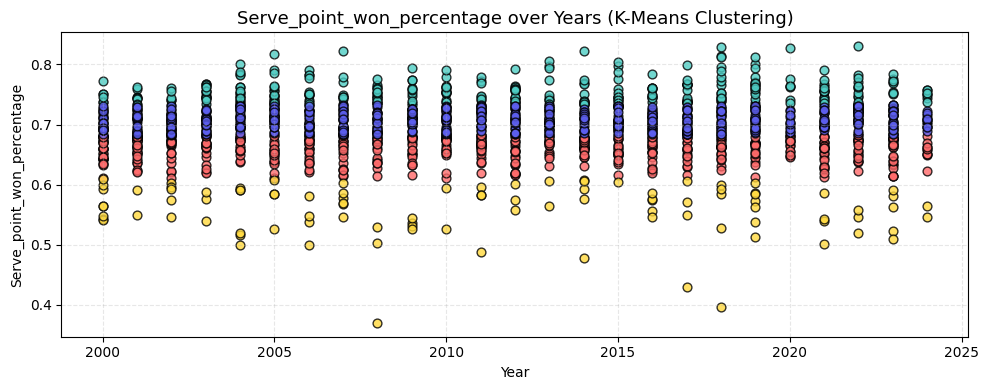

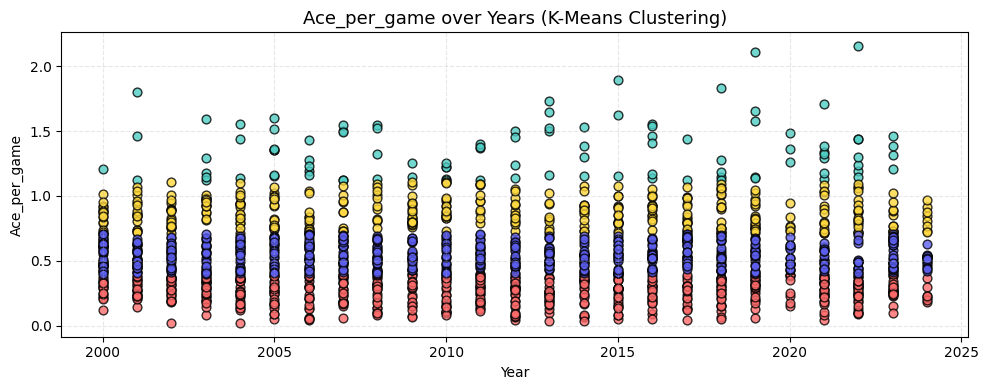

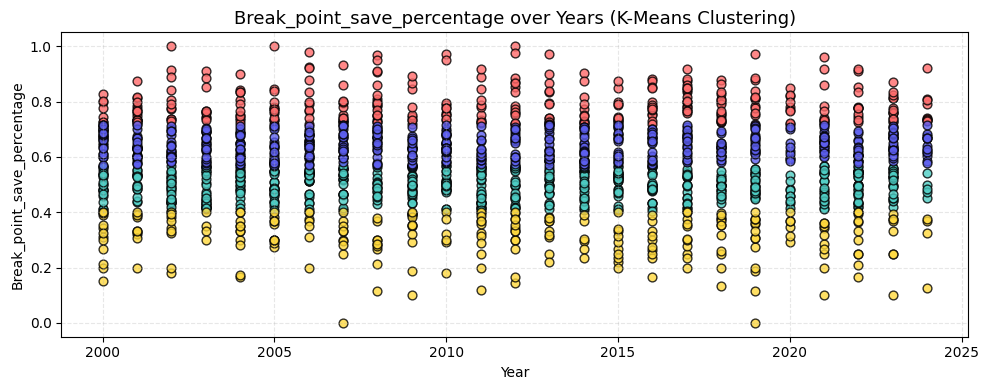

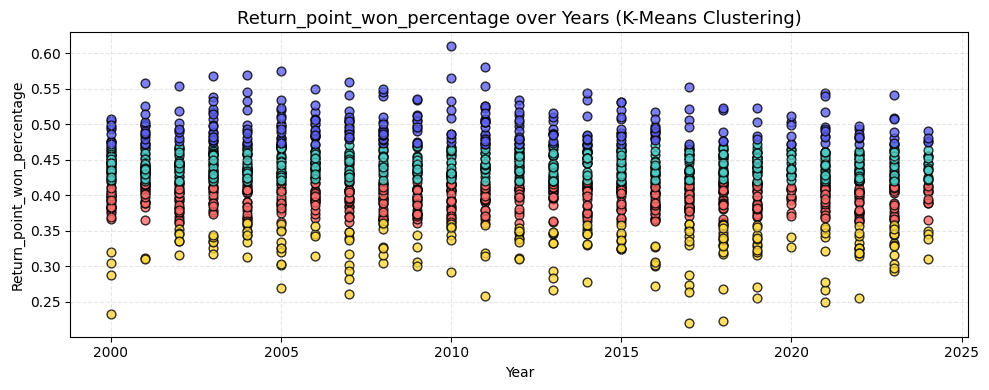

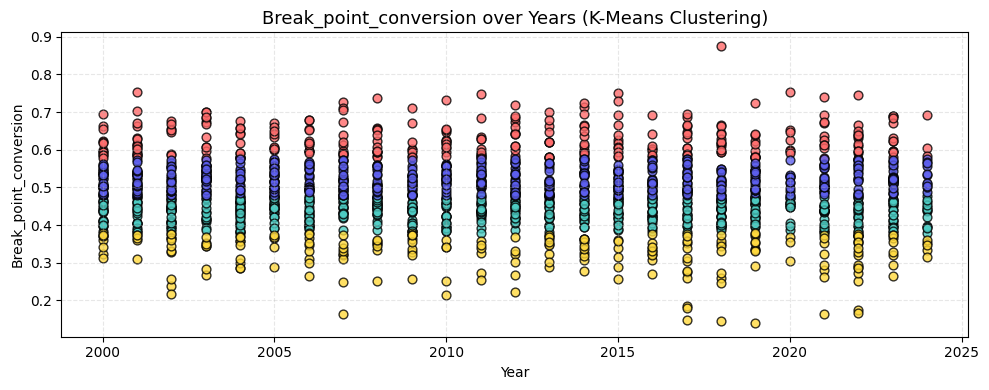

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# -------------------------
# CONFIG
# -------------------------
CSV_PATH = "updatedData.csv"
YEAR_COL = "Year"
METRICS = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]
N_CLUSTERS = 4
COLOR_MAP = ["#FF6B6B", "#4ECDC4", "#FFD93D", "#5D5FEF"]  # 4 pleasant, distinct colors
# -------------------------

# 1. Load data
df = pd.read_csv(CSV_PATH)

# 2. Loop through metrics
for metric in METRICS:
    df_metric = df[[YEAR_COL, metric]].dropna()
    X = df_metric[[metric]].values
    years = df_metric[YEAR_COL].values

    # Scale and cluster
    X_scaled = StandardScaler().fit_transform(X)
    kmeans = KMeans(n_clusters=N_CLUSTERS, n_init="auto", random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Plot
    plt.figure(figsize=(10, 4))
    for cluster_id in range(N_CLUSTERS):
        mask = clusters == cluster_id
        plt.scatter(
            years[mask],
            X[mask],
            color=COLOR_MAP[cluster_id],
            edgecolor="k",
            s=40,
            alpha=0.8
        )

    plt.title(f"{metric} over Years (K-Means Clustering)", fontsize=13)
    plt.xlabel("Year")
    plt.ylabel(metric)
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()


In the graphs above, I created 4 clusters for each metric across years. I observed that almost every year contains a similar number of data points in each cluster. For example, the number of points in cluster 3 remains fairly consistent year to year. This suggests that using linear regression would likely result in a straight line, and even with other methods, the trend would remain mostly linear—except for some years where noise may introduce slight deviations.

I think straight line is not an incredible prediction for these metrics because some years can be different, so I will try different Machine Learning methods and tried to find a line which can also anticipate noises of the data.

This code is for linear regression for each 5 metrics throguh years.

Serve_point_won_percentage - MSE: 0.0029, RMSE: 0.0537
Ace_per_game - MSE: 0.1079, RMSE: 0.3285
Break_point_save_percentage - MSE: 0.0261, RMSE: 0.1616
Return_point_won_percentage - MSE: 0.0032, RMSE: 0.0567
Break_point_conversion - MSE: 0.0091, RMSE: 0.0956


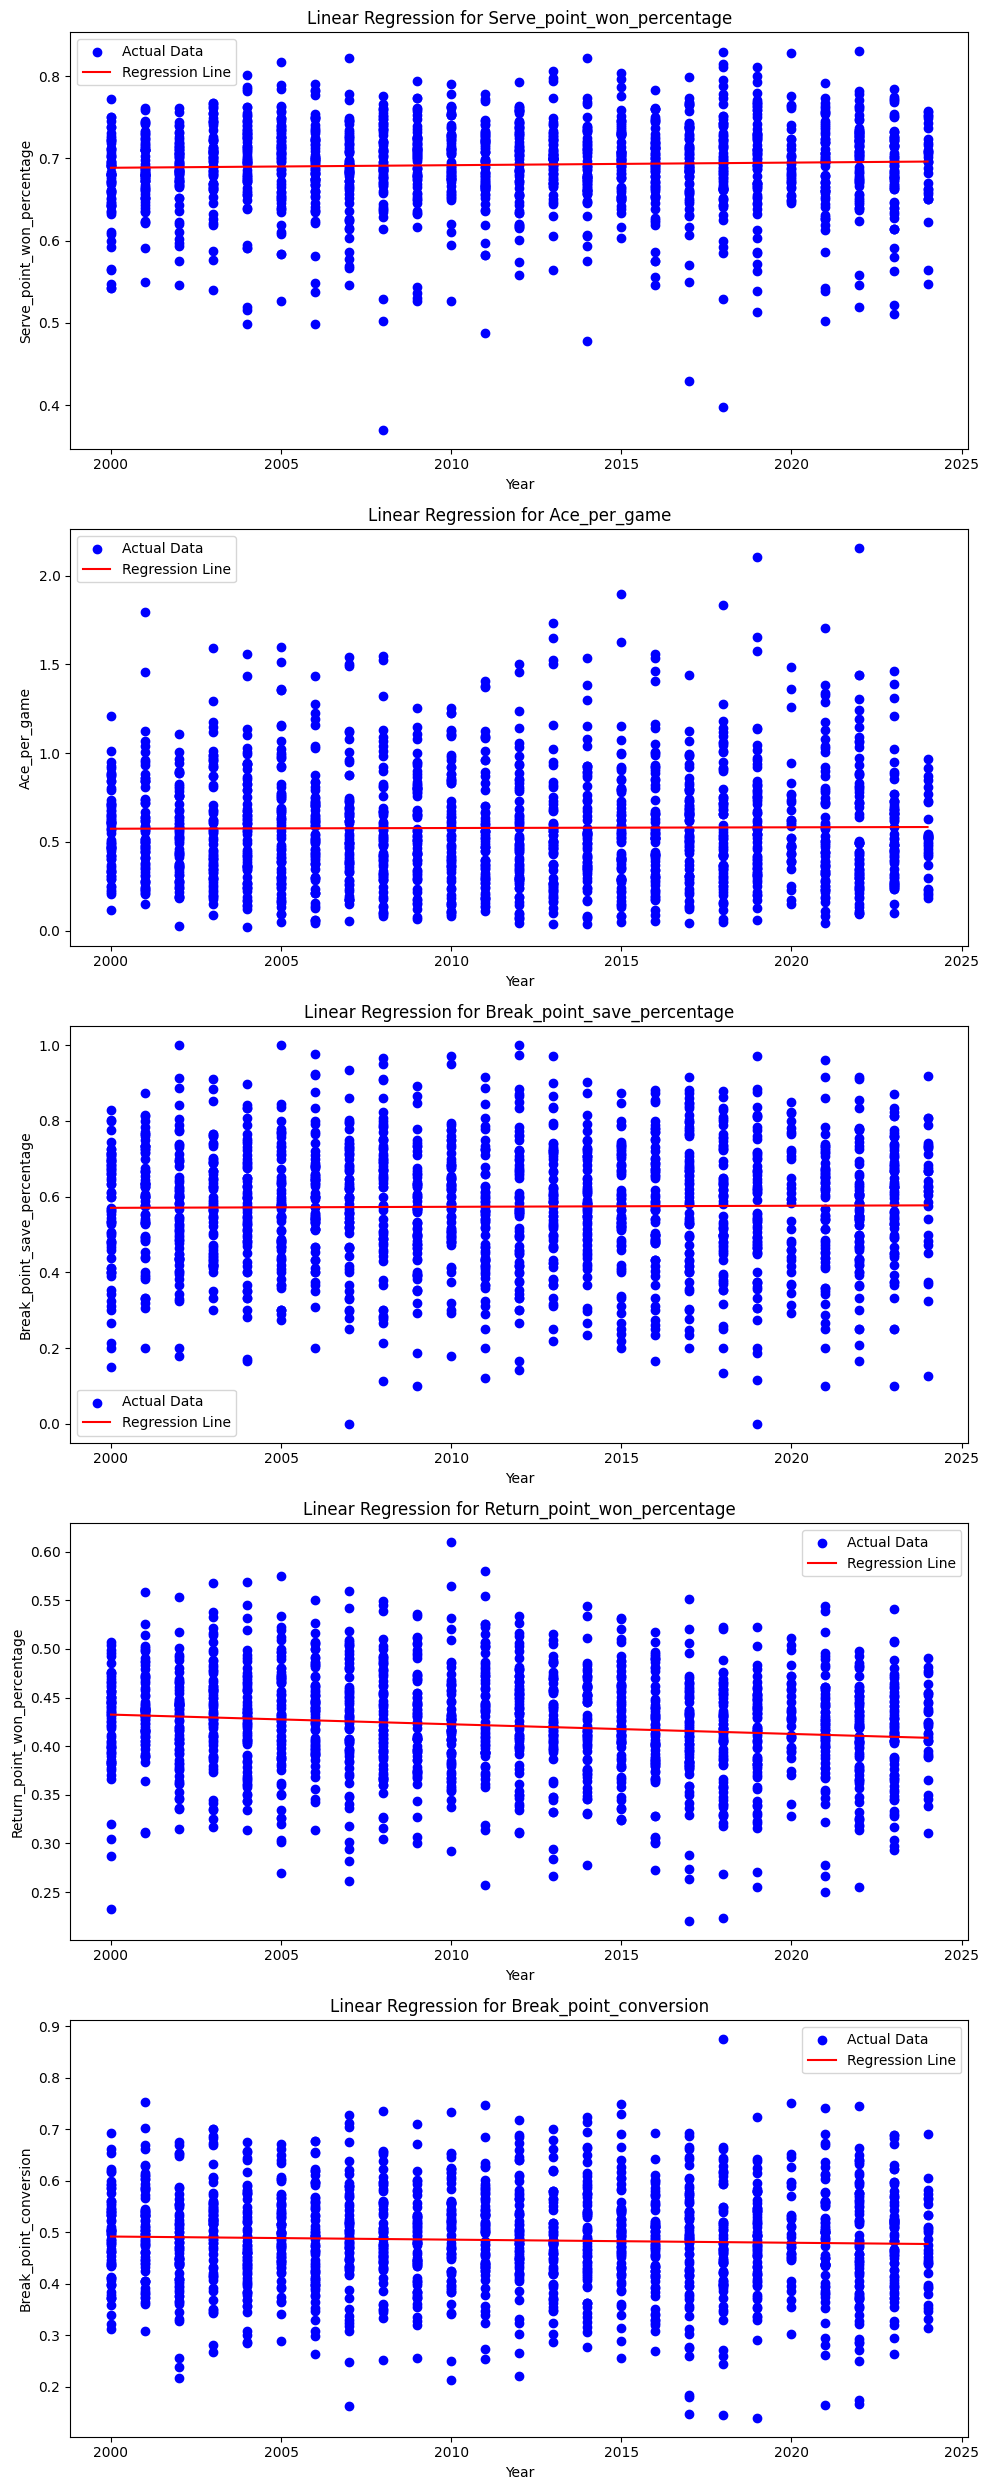

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
data = pd.read_csv('updatedData.csv')

# Define the features (X) - years
X = data[['Year']]  # Assuming 'Year' is the column name for years

# Define the target variables (metrics)
metrics = ['Serve_point_won_percentage', 'Ace_per_game', 'Break_point_save_percentage',
           'Return_point_won_percentage', 'Break_point_conversion']

# Create a figure and axes for the plots
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 5 * len(metrics)))  # Adjust figsize as needed

# Loop through each metric and create a linear regression model and plot
for i, metric in enumerate(metrics):
    y = data[[metric]]  # Target variable for the current metric

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the entire range of years
    X_range = pd.DataFrame({'Year': range(data['Year'].min(), data['Year'].max() + 1)})
    y_pred_range = model.predict(X_range)

    # Predict on test set for error calculation
    y_pred_test = model.predict(X_test)

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    print(f'{metric} - MSE: {mse:.4f}, RMSE: {rmse:.4f}')

    # Plot the data and the regression line
    ax = axes[i]  # Get the current axis
    ax.scatter(X, y, color='blue', label='Actual Data')  # Scatter plot of actual data
    ax.plot(X_range['Year'], y_pred_range, color='red', label='Regression Line')  # Line plot of predictions

    ax.set_title(f'Linear Regression for {metric}')
    ax.set_xlabel('Year')
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


This code is for linear regression for each tournament level.

[A] Serve_point_won_percentage - R²: 0.001, MSE: 0.0025, RMSE: 0.0502
[A] Ace_per_game - R²: -0.004, MSE: 0.1151, RMSE: 0.3393
[A] Break_point_save_percentage - R²: -0.001, MSE: 0.0229, RMSE: 0.1513
[A] Return_point_won_percentage - R²: 0.014, MSE: 0.0030, RMSE: 0.0549
[A] Break_point_conversion - R²: 0.000, MSE: 0.0115, RMSE: 0.1073


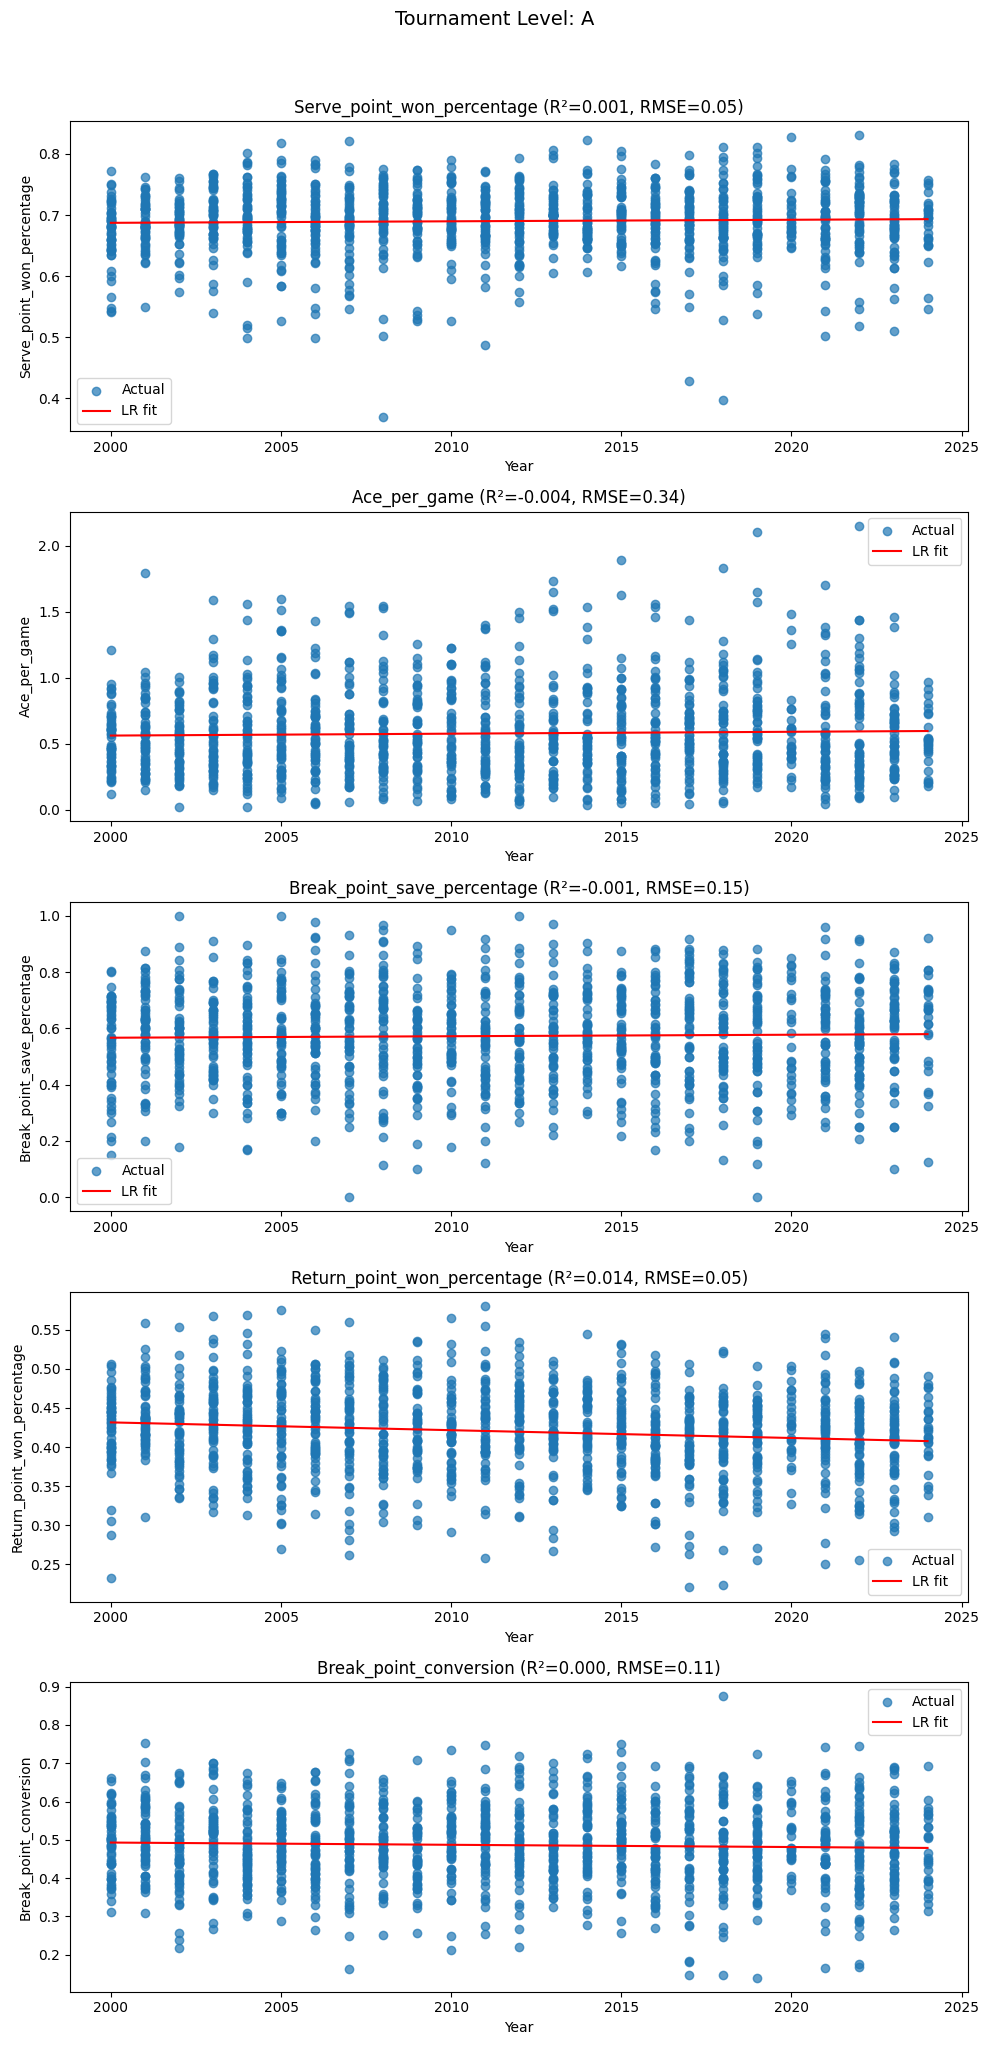

[M] Serve_point_won_percentage - R²: -0.075, MSE: 0.0037, RMSE: 0.0611
[M] Ace_per_game - R²: -0.016, MSE: 0.0849, RMSE: 0.2914
[M] Break_point_save_percentage - R²: -0.072, MSE: 0.0175, RMSE: 0.1323
[M] Return_point_won_percentage - R²: 0.075, MSE: 0.0032, RMSE: 0.0568
[M] Break_point_conversion - R²: -0.053, MSE: 0.0053, RMSE: 0.0727


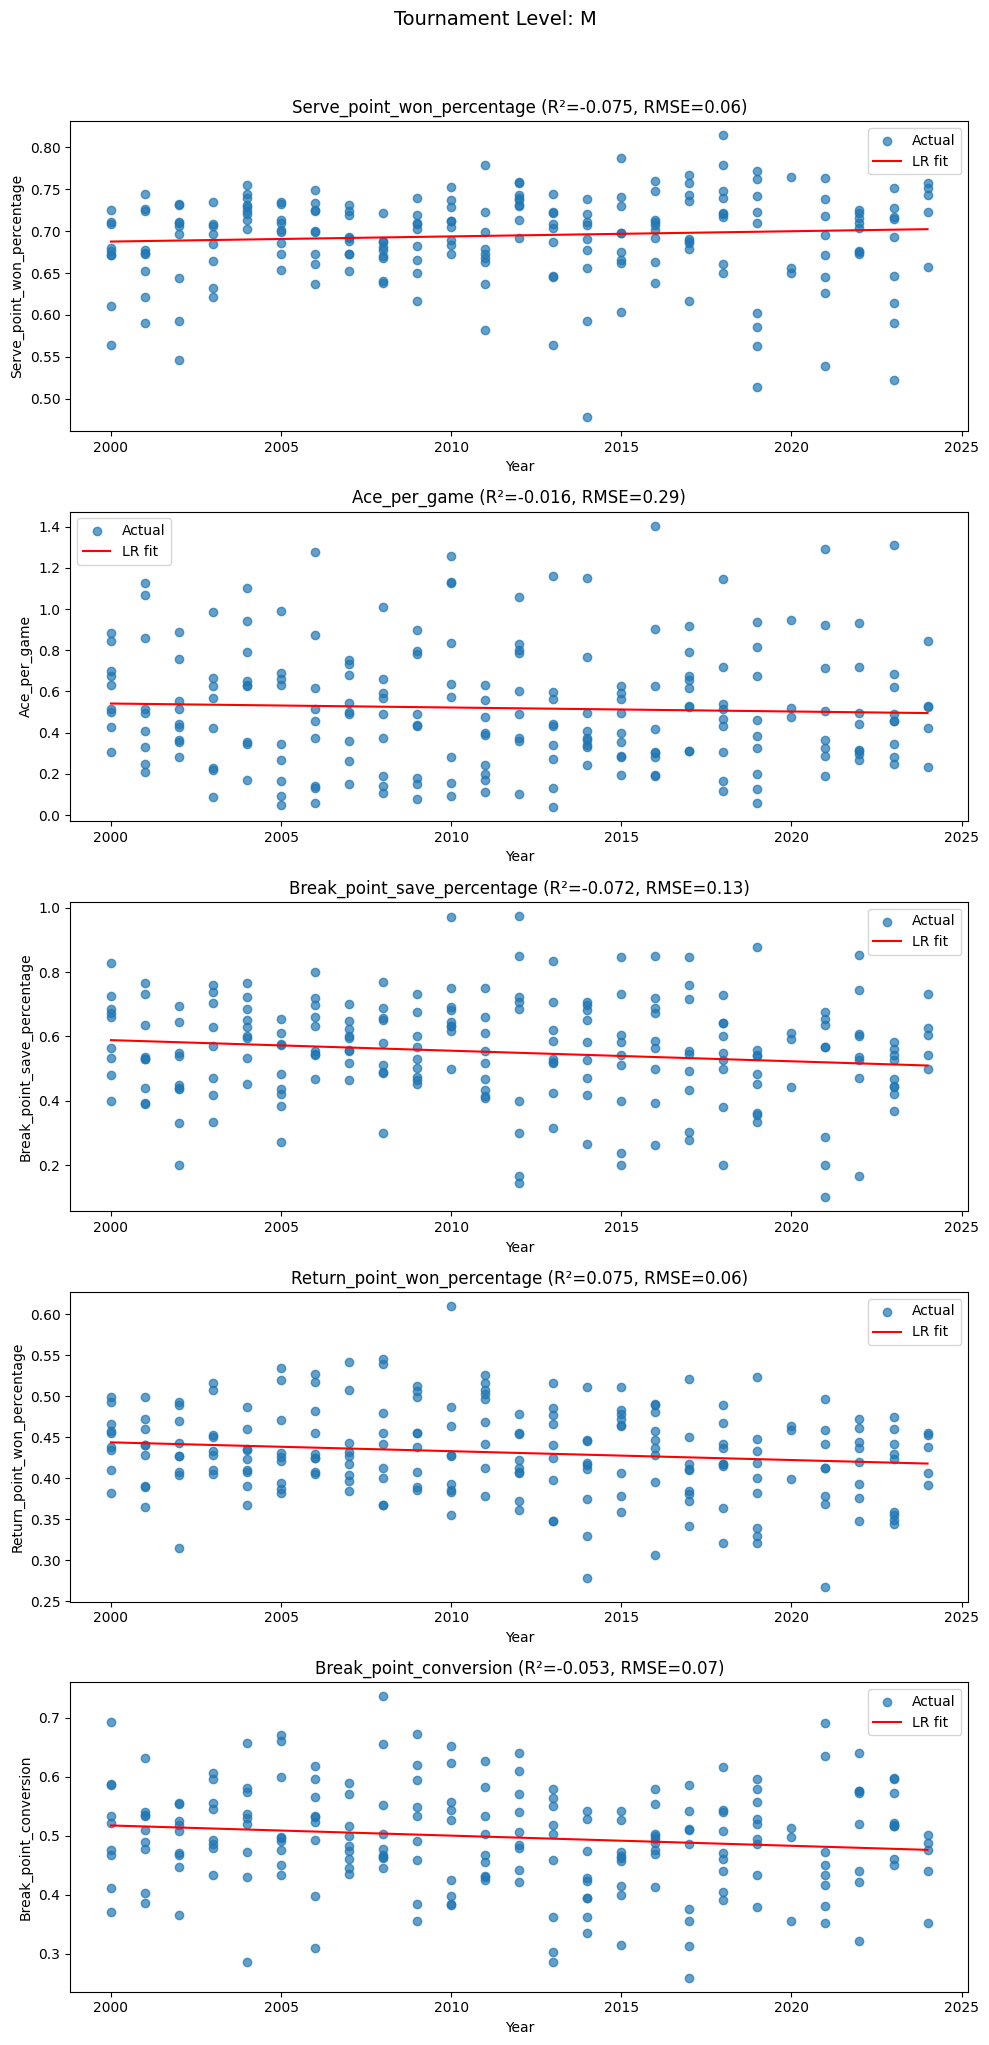

[G] Serve_point_won_percentage - R²: 0.004, MSE: 0.0009, RMSE: 0.0302
[G] Ace_per_game - R²: 0.049, MSE: 0.0256, RMSE: 0.1599
[G] Break_point_save_percentage - R²: -0.013, MSE: 0.0102, RMSE: 0.1012
[G] Return_point_won_percentage - R²: 0.000, MSE: 0.0012, RMSE: 0.0340
[G] Break_point_conversion - R²: 0.047, MSE: 0.0031, RMSE: 0.0557


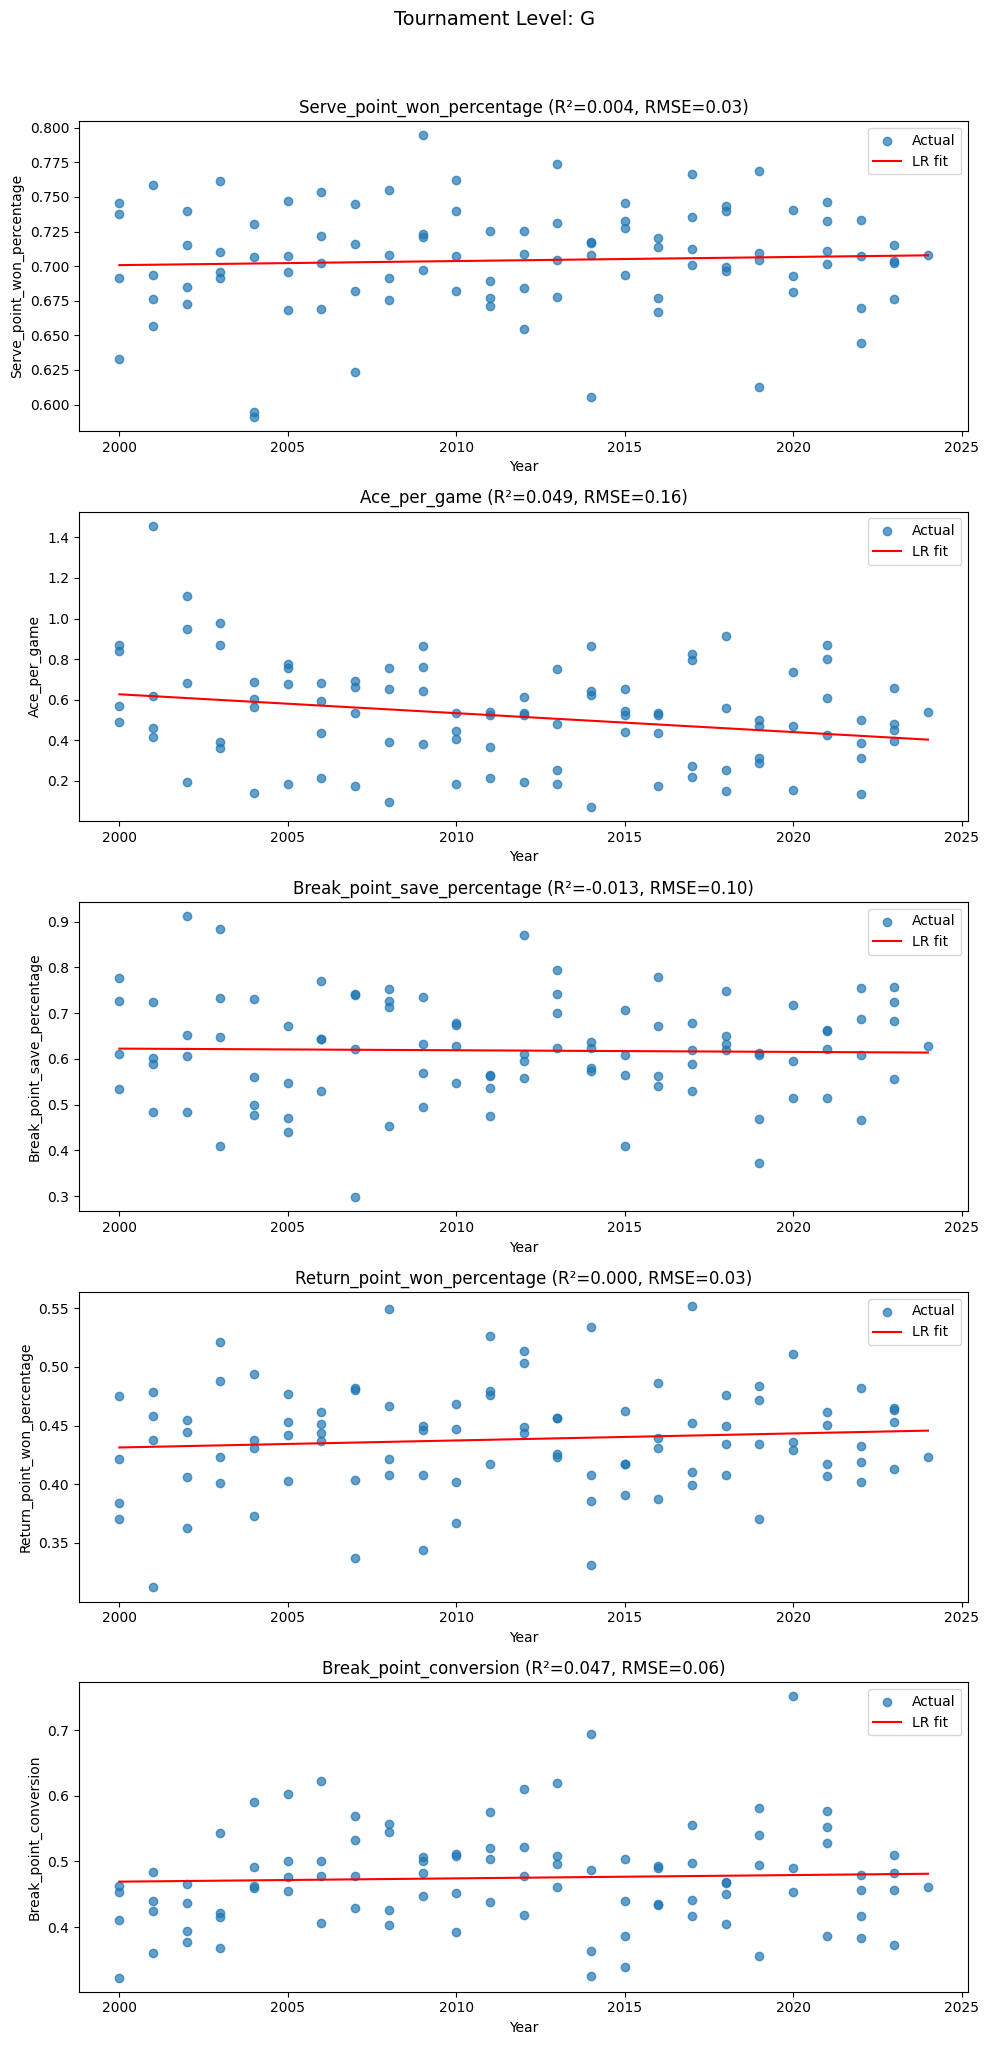

[F] Serve_point_won_percentage - R²: -1.592, MSE: 0.0010, RMSE: 0.0313
[F] Ace_per_game - R²: -0.605, MSE: 0.0516, RMSE: 0.2273
[F] Break_point_save_percentage - R²: -0.178, MSE: 0.0535, RMSE: 0.2313
[F] Return_point_won_percentage - R²: -6.066, MSE: 0.0020, RMSE: 0.0449
[F] Break_point_conversion - R²: -0.377, MSE: 0.0035, RMSE: 0.0595


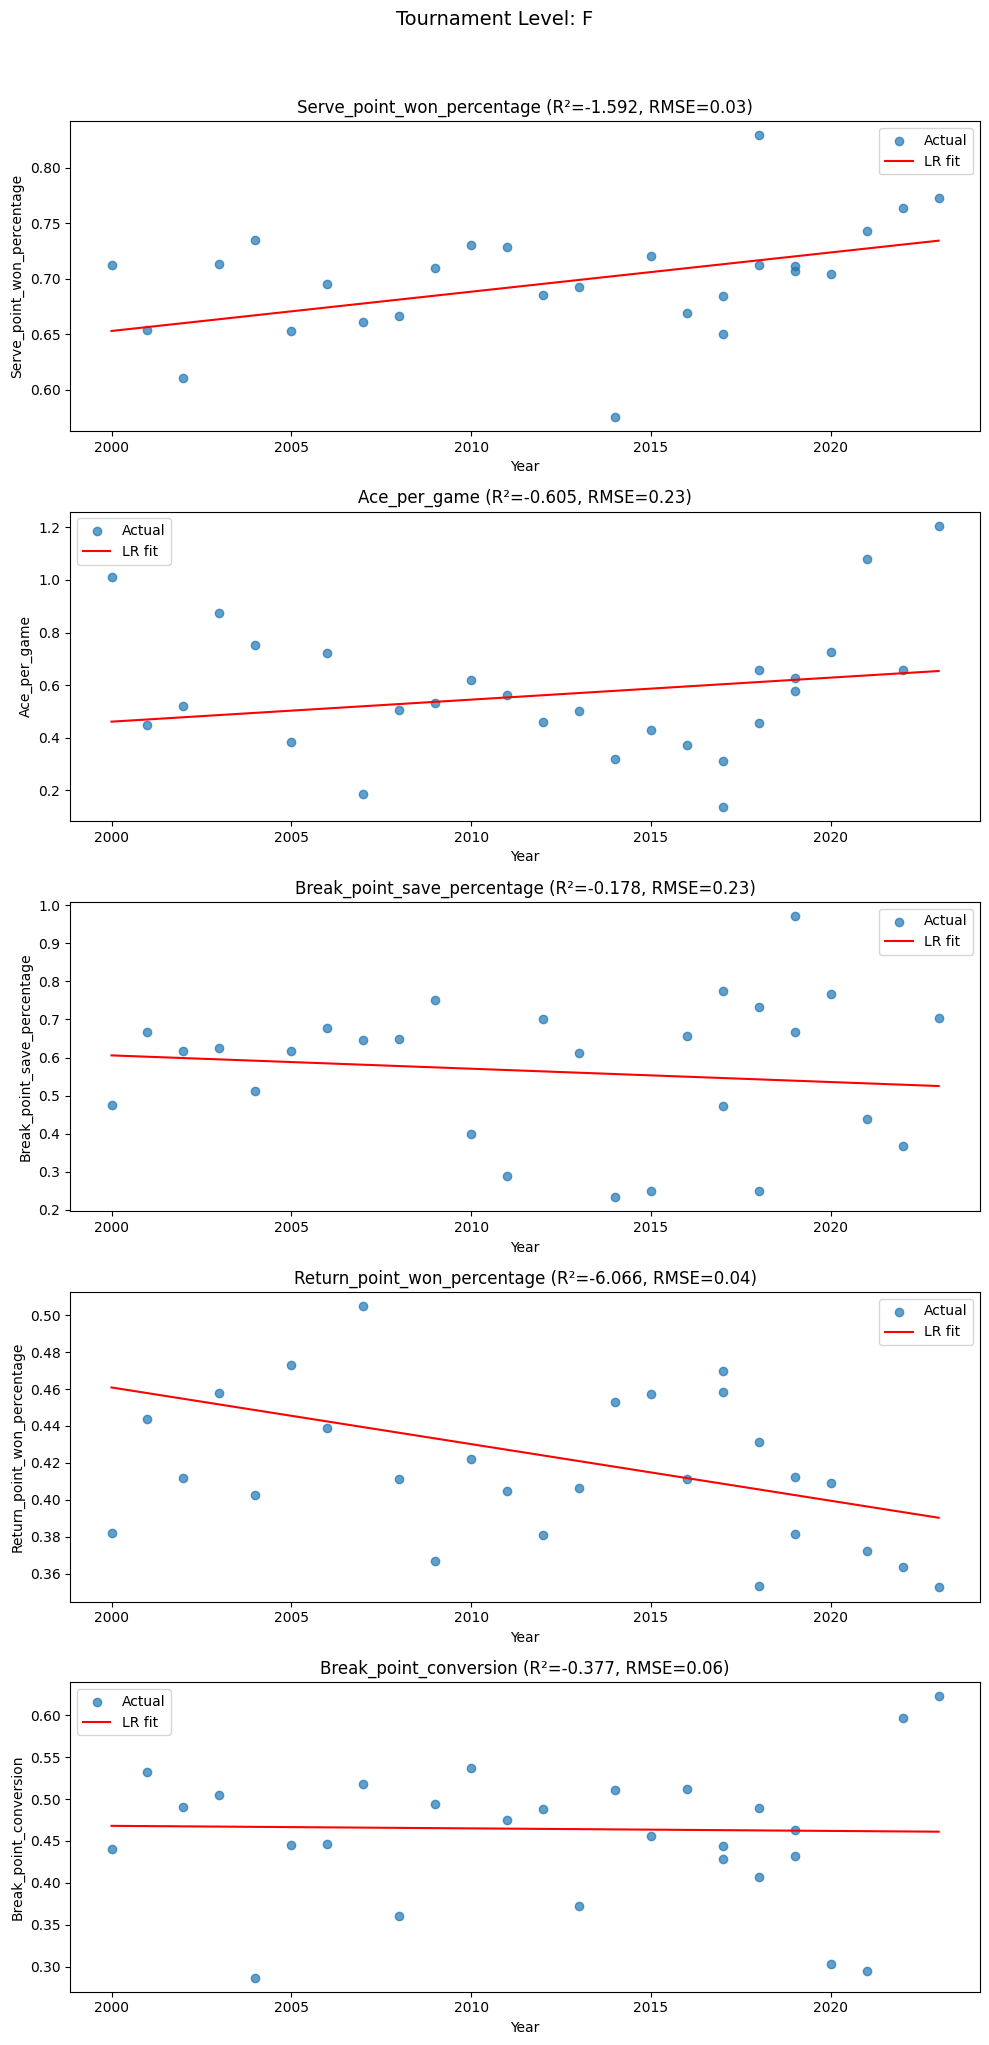

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

CSV_PATH    = "updatedData.csv"
YEAR_COL    = "Year"
LEVEL_COL   = "tourney_level"
LEVELS      = ["A", "M", "G", "F"]
METRICS     = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]

def plot_for_level(df: pd.DataFrame, level: str):
    subset = df[df[LEVEL_COL] == level]
    if subset.empty:
        print(f"[warn] No data for tourney_level = {level}")
        return

    fig, axes = plt.subplots(len(METRICS), 1, figsize=(10, 4 * len(METRICS)))
    fig.suptitle(f"Tournament Level: {level}", fontsize=14, y=1.02)

    for i, metric in enumerate(METRICS):
        X = subset[[YEAR_COL]]
        y = subset[[metric]]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        model = LinearRegression()
        model.fit(X_train, y_train)
        r2 = model.score(X_test, y_test)

        # Predict on test set for error calculation
        y_test_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)

        print(f"[{level}] {metric} - R²: {r2:.3f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

        # Predict on full year range for plotting
        X_range = pd.DataFrame({
            YEAR_COL: range(subset[YEAR_COL].min(), subset[YEAR_COL].max() + 1)
        })
        y_pred = model.predict(X_range)

        ax = axes[i]
        ax.scatter(X, y, label="Actual", alpha=0.7)
        ax.plot(X_range[YEAR_COL], y_pred, color="red", label="LR fit")
        ax.set_xlabel("Year")
        ax.set_ylabel(metric)
        ax.set_title(f"{metric} (R²={r2:.3f}, RMSE={rmse:.2f})")
        ax.legend()

    plt.tight_layout()
    plt.show()

# MAIN: run for each level
df = pd.read_csv(CSV_PATH)
for level in LEVELS:
    plot_for_level(df, level)


This code is for each surface.

[Clay] Serve_point_won_percentage - R²: -0.037, MSE: 0.0020, RMSE: 0.0450
[Clay] Ace_per_game - R²: -0.003, MSE: 0.0514, RMSE: 0.2266
[Clay] Break_point_save_percentage - R²: -0.004, MSE: 0.0220, RMSE: 0.1485
[Clay] Return_point_won_percentage - R²: 0.031, MSE: 0.0022, RMSE: 0.0472
[Clay] Break_point_conversion - R²: 0.001, MSE: 0.0079, RMSE: 0.0891


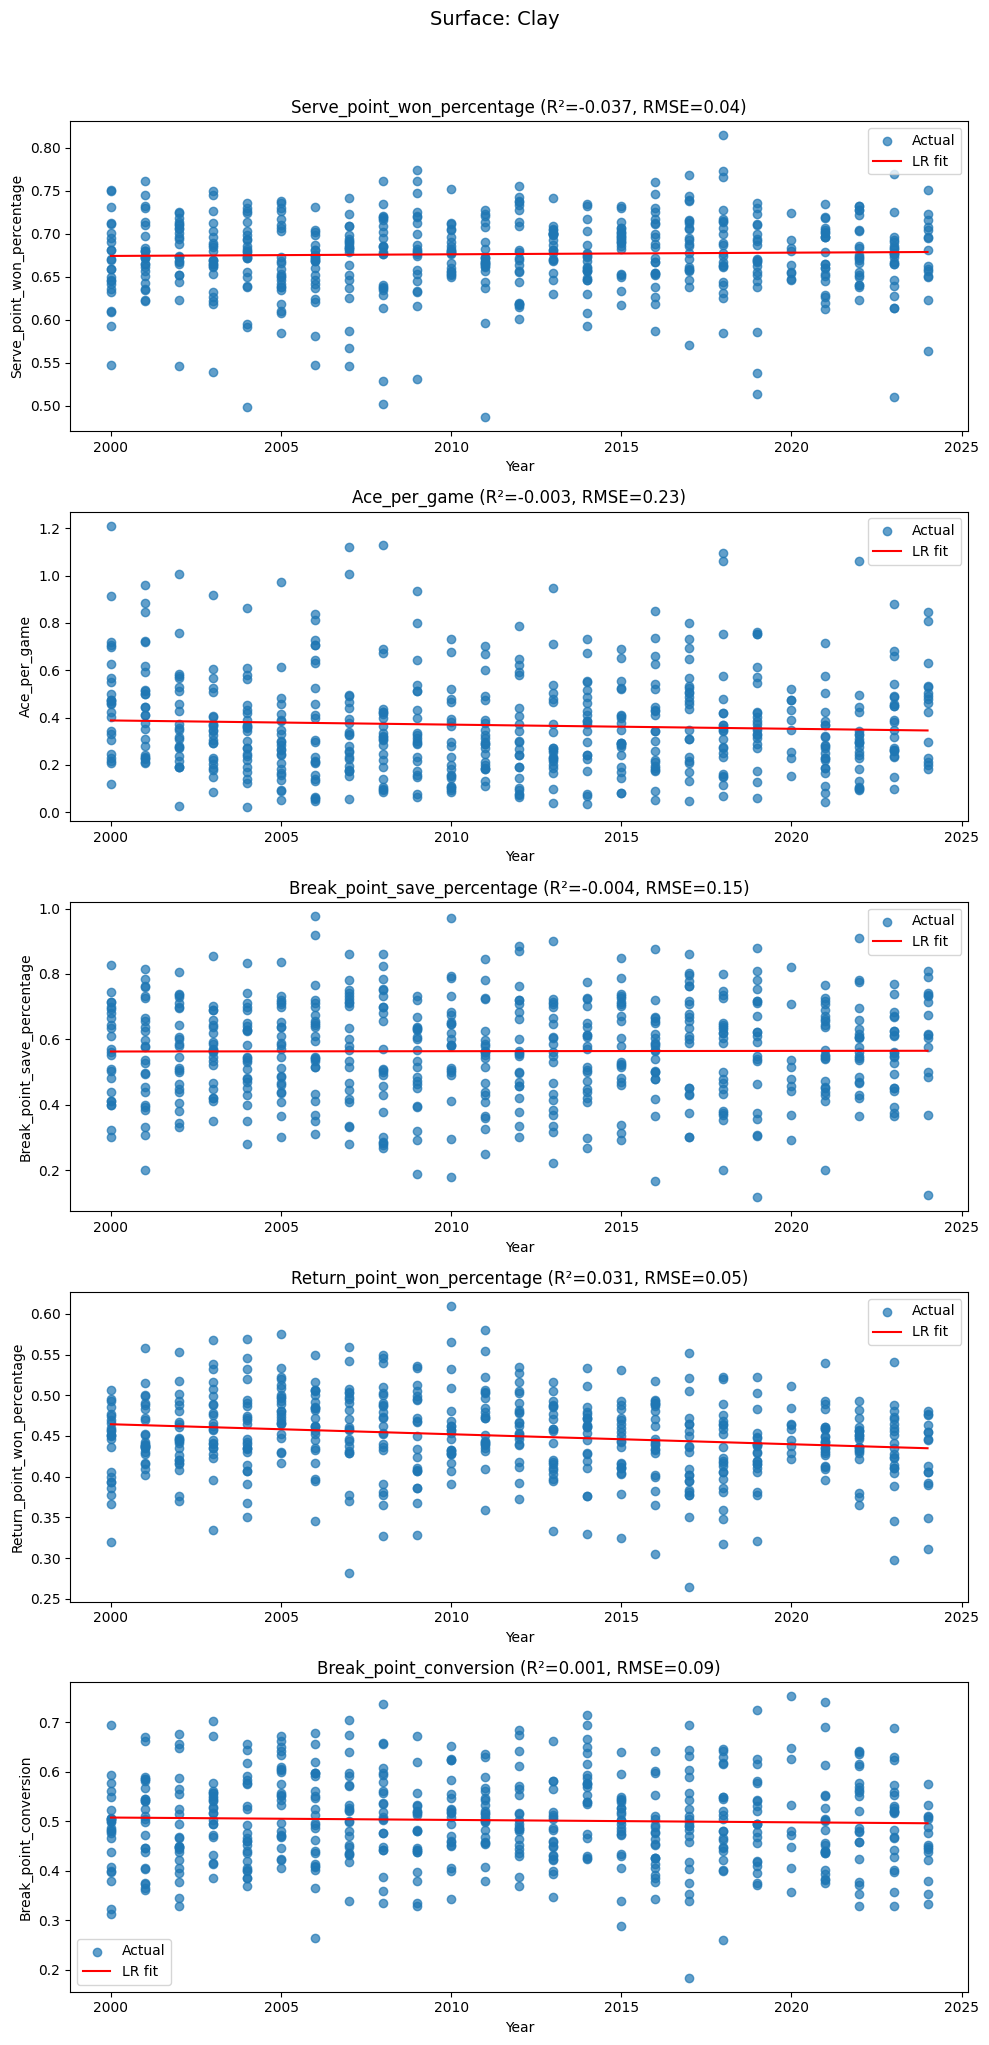

[Hard] Serve_point_won_percentage - R²: -0.001, MSE: 0.0039, RMSE: 0.0621
[Hard] Ace_per_game - R²: -0.015, MSE: 0.1275, RMSE: 0.3571
[Hard] Break_point_save_percentage - R²: -0.008, MSE: 0.0299, RMSE: 0.1729
[Hard] Return_point_won_percentage - R²: 0.016, MSE: 0.0031, RMSE: 0.0560
[Hard] Break_point_conversion - R²: 0.001, MSE: 0.0118, RMSE: 0.1087


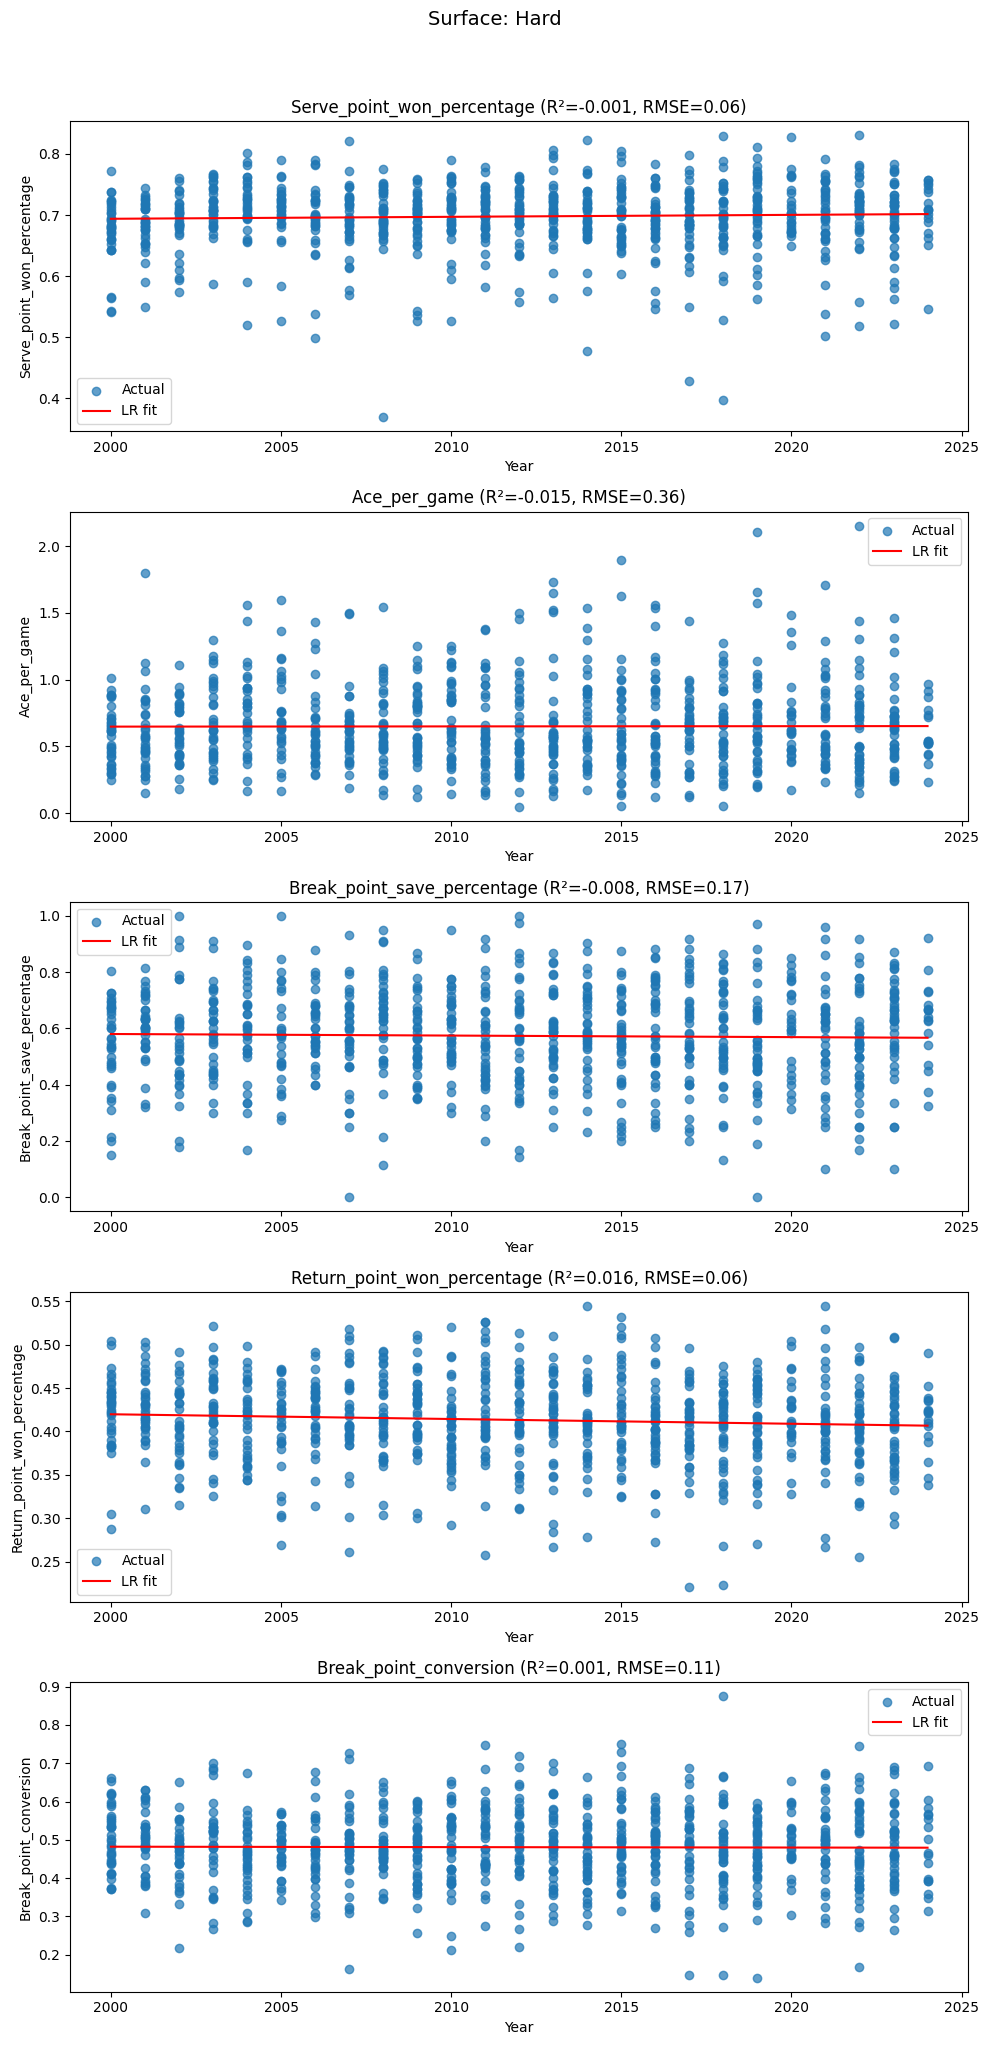

[Carpet] Serve_point_won_percentage - R²: -2.293, MSE: 0.0009, RMSE: 0.0296
[Carpet] Ace_per_game - R²: -0.115, MSE: 0.0212, RMSE: 0.1455
[Carpet] Break_point_save_percentage - R²: -0.174, MSE: 0.0227, RMSE: 0.1507
[Carpet] Return_point_won_percentage - R²: -0.104, MSE: 0.0026, RMSE: 0.0506
[Carpet] Break_point_conversion - R²: -0.036, MSE: 0.0197, RMSE: 0.1402


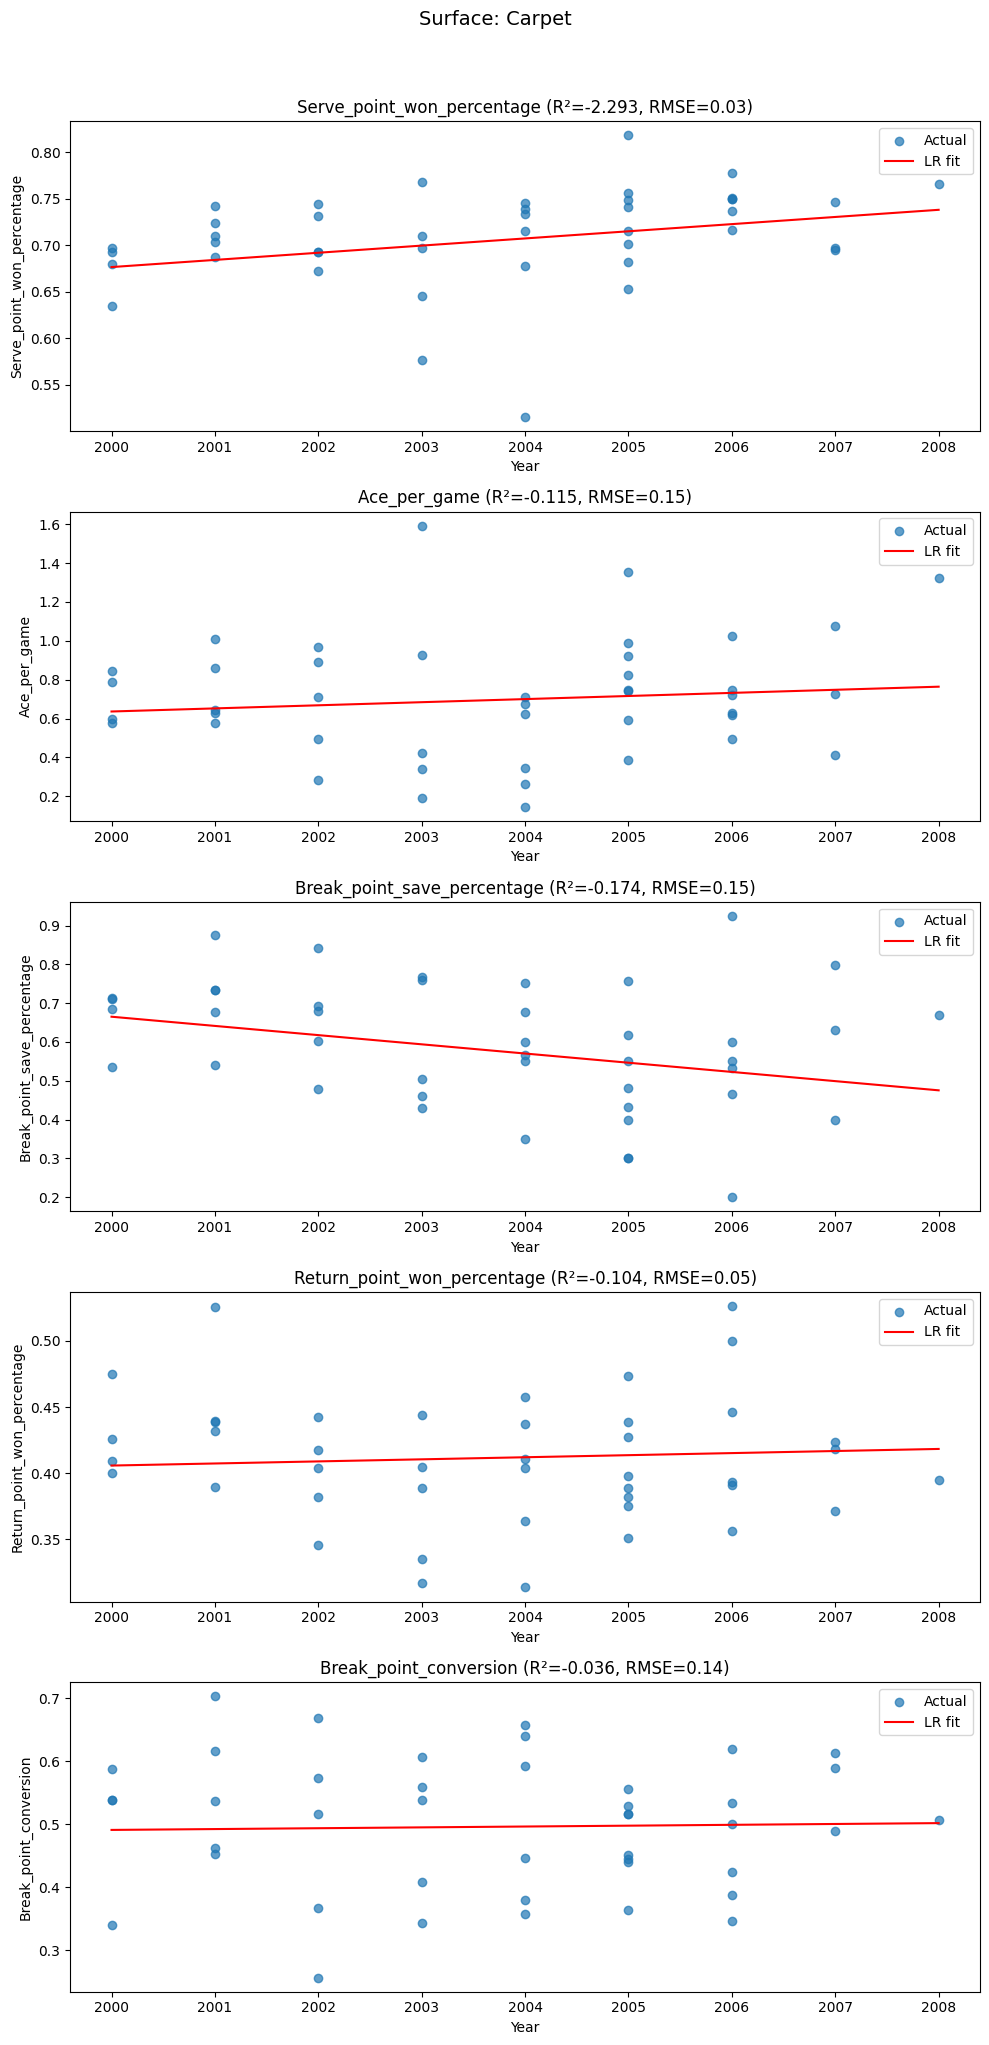

[Grass] Serve_point_won_percentage - R²: -0.011, MSE: 0.0019, RMSE: 0.0433
[Grass] Ace_per_game - R²: -0.057, MSE: 0.0969, RMSE: 0.3112
[Grass] Break_point_save_percentage - R²: 0.002, MSE: 0.0241, RMSE: 0.1553
[Grass] Return_point_won_percentage - R²: -0.027, MSE: 0.0022, RMSE: 0.0469
[Grass] Break_point_conversion - R²: -0.018, MSE: 0.0135, RMSE: 0.1163


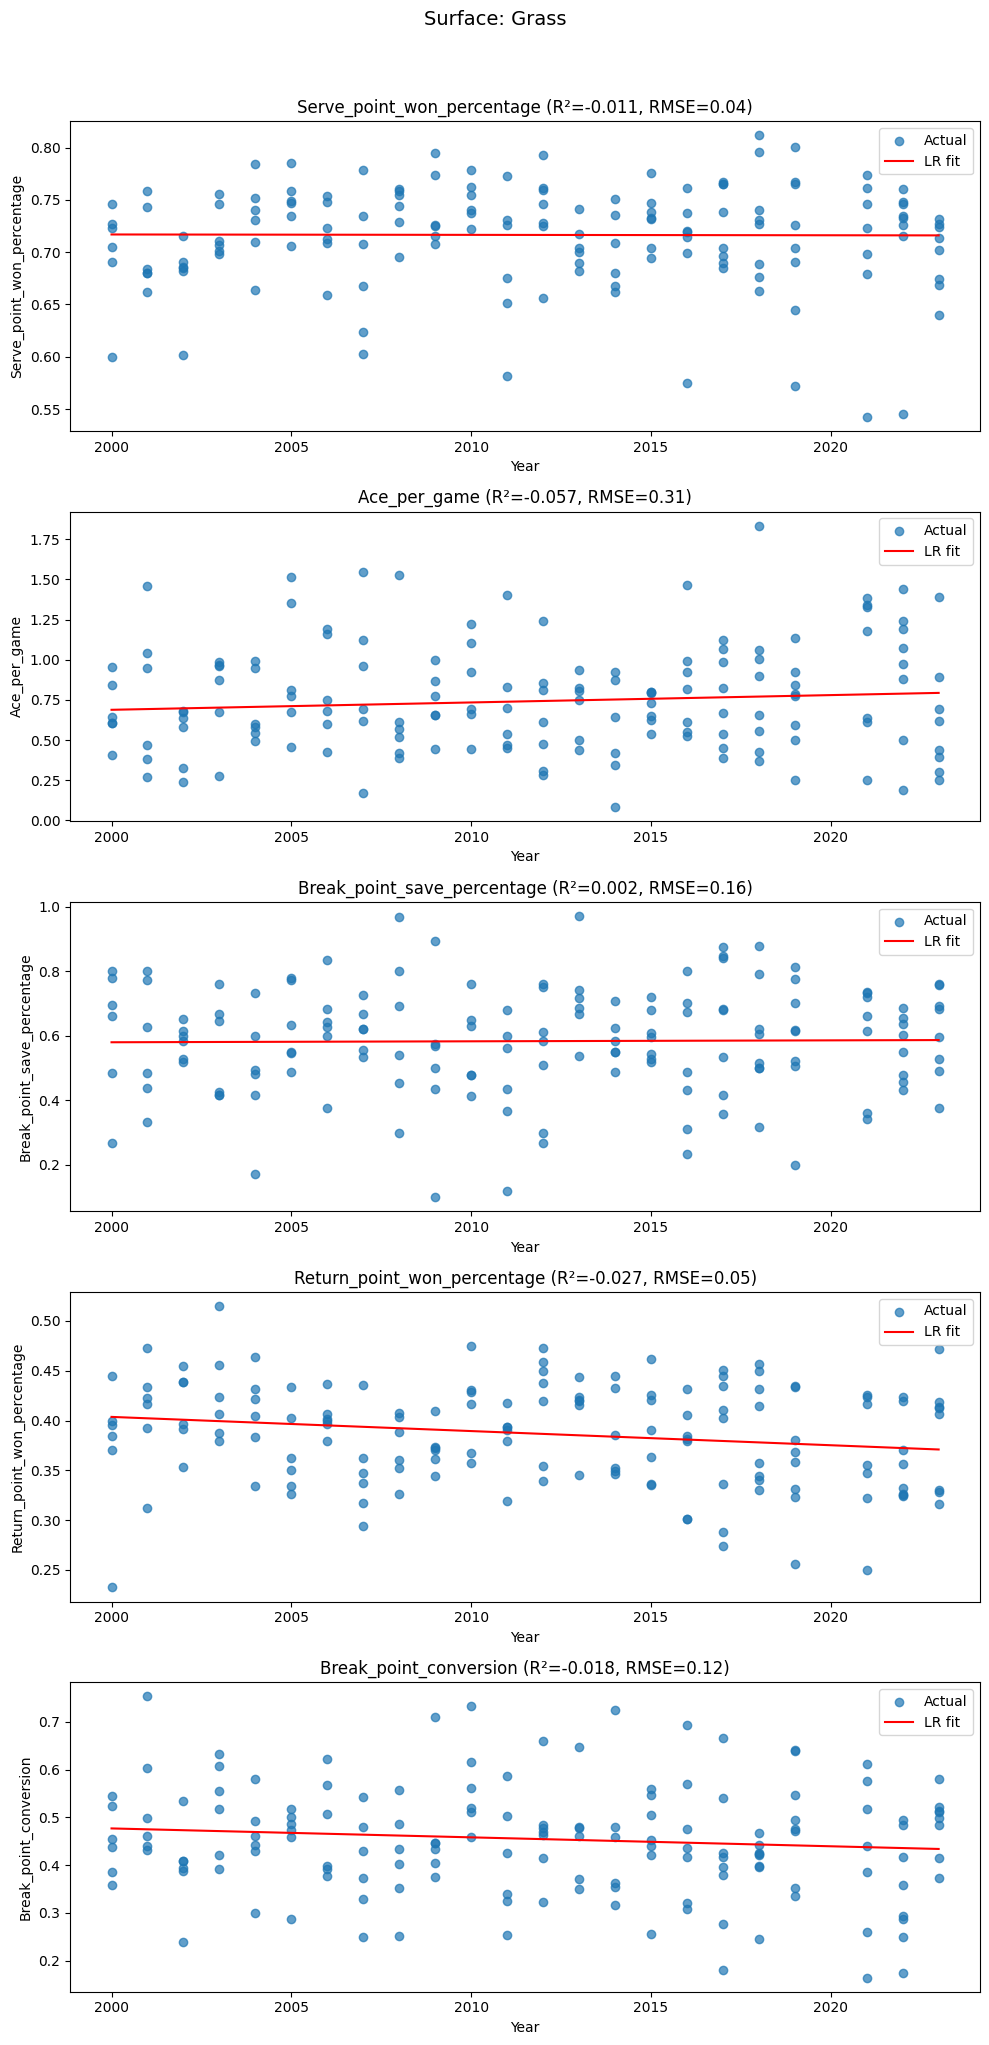

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

CSV_PATH     = "updatedData.csv"
YEAR_COL     = "Year"
SURFACE_COL  = "surface"
SURFACES     = ["Clay", "Hard", "Carpet", "Grass"]
METRICS      = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]

def plot_for_surface(df: pd.DataFrame, surface: str):
    subset = df[df[SURFACE_COL] == surface]
    if subset.empty:
        print(f"[warn] No data for surface = {surface}")
        return

    fig, axes = plt.subplots(len(METRICS), 1, figsize=(10, 4 * len(METRICS)))
    fig.suptitle(f"Surface: {surface}", fontsize=14, y=1.02)

    for i, metric in enumerate(METRICS):
        X = subset[[YEAR_COL]]
        y = subset[[metric]]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        model = LinearRegression()
        model.fit(X_train, y_train)
        r2 = model.score(X_test, y_test)

        # Predict on test set for error metrics
        y_test_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)

        print(f"[{surface}] {metric} - R²: {r2:.3f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

        # Predict on full year range for plotting
        X_range = pd.DataFrame({
            YEAR_COL: range(subset[YEAR_COL].min(), subset[YEAR_COL].max() + 1)
        })
        y_pred = model.predict(X_range)

        ax = axes[i]
        ax.scatter(X, y, label="Actual", alpha=0.7)
        ax.plot(X_range[YEAR_COL], y_pred, color="red", label="LR fit")
        ax.set_xlabel("Year")
        ax.set_ylabel(metric)
        ax.set_title(f"{metric} (R²={r2:.3f}, RMSE={rmse:.2f})")
        ax.legend()

    plt.tight_layout()
    plt.show()

# MAIN: run for each surface
df = pd.read_csv(CSV_PATH)
for surface in SURFACES:
    plot_for_surface(df, surface)


The lines are showing mean does not change a lot and that is compatible with my results from hypothesis testing, but there is lots of dots (data) which are outliers, so I will try another methods too.

This is decision tree method with XGBoost algorithm for each metrics through years.

Serve_point_won_percentage     | MAE = 0.040 | MSE = 0.003 | RMSE = 0.054 | R² = -0.024


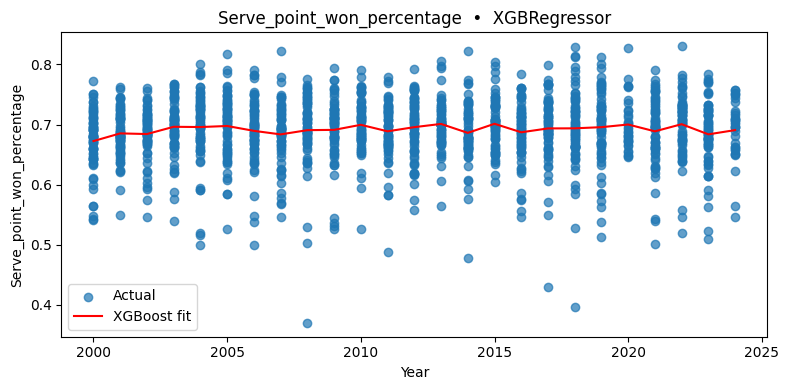

Ace_per_game                   | MAE = 0.260 | MSE = 0.110 | RMSE = 0.331 | R² = -0.004


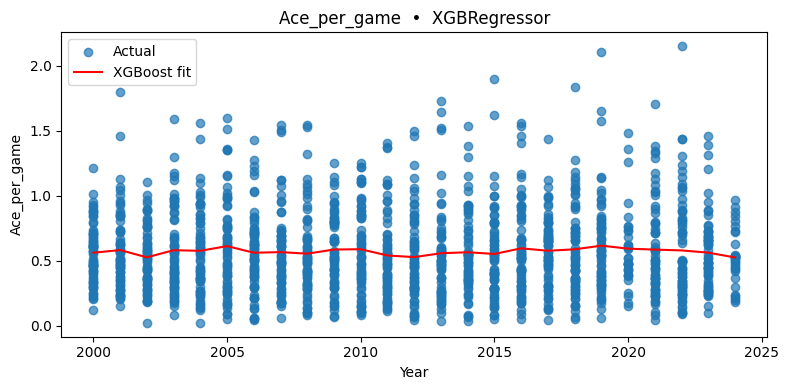

Break_point_save_percentage    | MAE = 0.136 | MSE = 0.029 | RMSE = 0.170 | R² = -0.063


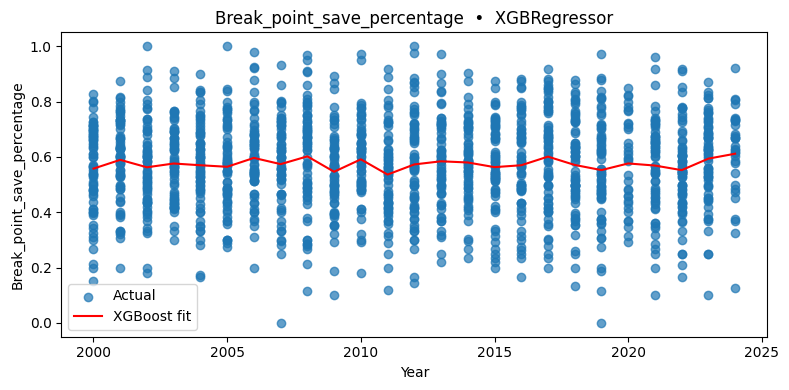

Return_point_won_percentage    | MAE = 0.044 | MSE = 0.003 | RMSE = 0.057 | R² = -0.114


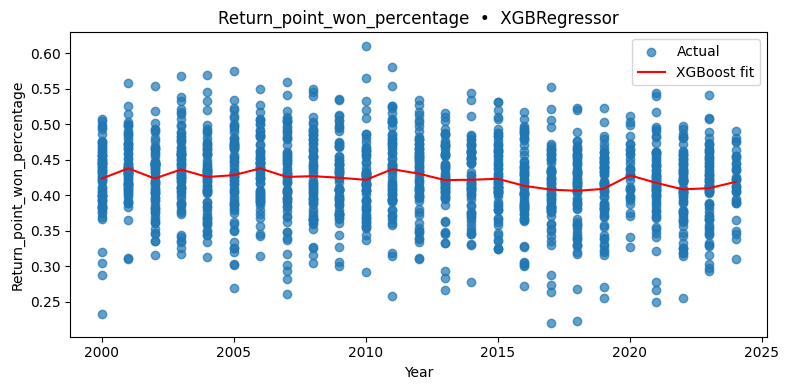

Break_point_conversion         | MAE = 0.080 | MSE = 0.010 | RMSE = 0.102 | R² = -0.067


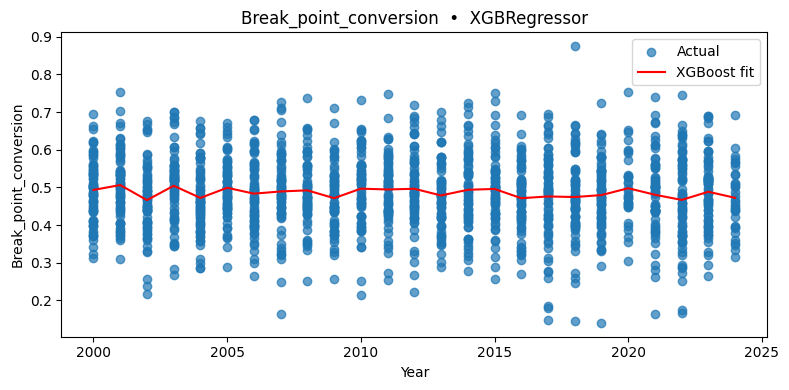

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# -------------------------------------------------
# CONFIG – adjust column names & model hyper‑params
# -------------------------------------------------
CSV_PATH   = "updatedData.csv"
YEAR_COL   = "Year"
METRICS    = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]

XGB_PARAMS = dict(
    objective="reg:squarederror",
    n_estimators=400,      # trees
    learning_rate=0.05,    # shrinkage
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
N_SPLITS = 5              # time‑series CV folds
PLOT_FITS = True          # set False if you only want the numbers
# -------------------------------------------------

df = pd.read_csv("updatedData.csv")

tscv = TimeSeriesSplit(n_splits=N_SPLITS)

for metric in METRICS:
    X = df[[YEAR_COL]].values        # shape (n_samples, 1)
    y = df[metric].values

    mae_scores, mse_scores, rmse_scores, r2_scores = [], [], [], []

    # ---------- time‑series cross‑validation ----------
    for train_idx, test_idx in tscv.split(X):
        model = XGBRegressor(**XGB_PARAMS)
        model.fit(X[train_idx], y[train_idx])

        y_pred = model.predict(X[test_idx])
        mae = mean_absolute_error(y[test_idx], y_pred)
        mse = mean_squared_error(y[test_idx], y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y[test_idx], y_pred)

        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    print(f"{metric:30} | MAE = {np.mean(mae_scores):.3f}"
          f" | MSE = {np.mean(mse_scores):.3f}"
          f" | RMSE = {np.mean(rmse_scores):.3f}"
          f" | R² = {np.mean(r2_scores):.3f}")

    # ---------- final fit on the whole series ----------
    model_full = XGBRegressor(**XGB_PARAMS).fit(X, y)

    if PLOT_FITS:
        years_grid = pd.DataFrame({
            YEAR_COL: range(df[YEAR_COL].min(), df[YEAR_COL].max() + 1)
        })
        y_grid_pred = model_full.predict(years_grid)

        plt.figure(figsize=(8, 4))
        plt.scatter(X, y, label="Actual", alpha=0.7)
        plt.plot(years_grid, y_grid_pred, color="red", label="XGBoost fit")
        plt.title(f"{metric}  •  XGBRegressor")
        plt.xlabel("Year")
        plt.ylabel(metric)
        plt.legend()
        plt.tight_layout()
        plt.show()


This is code for each surface.


=== Surface: Clay ===
Serve_point_won_percentage     | MAE = 0.035 | MSE = 0.002 | RMSE = 0.046 | R² = -0.069


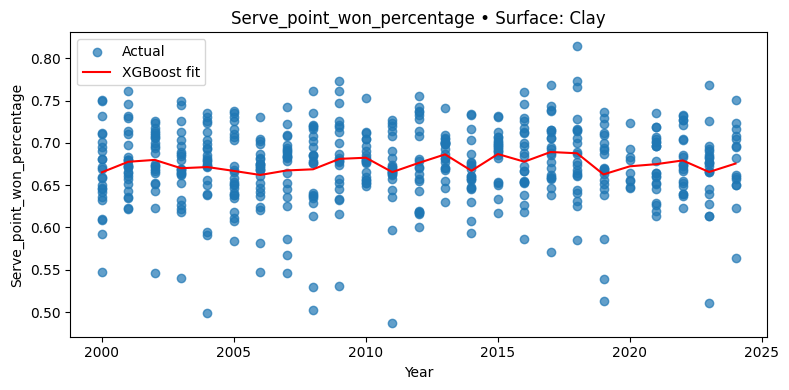

Ace_per_game                   | MAE = 0.166 | MSE = 0.045 | RMSE = 0.211 | R² = -0.053


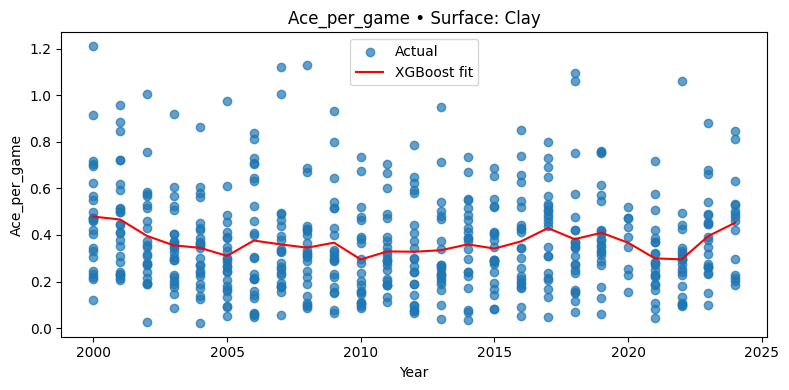

Break_point_save_percentage    | MAE = 0.125 | MSE = 0.024 | RMSE = 0.156 | R² = -0.032


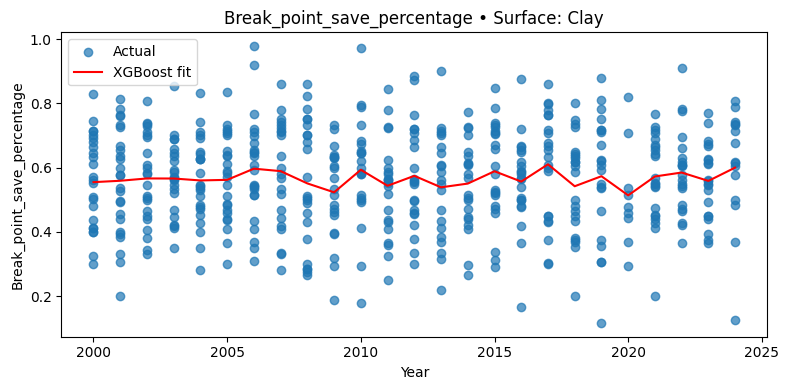

Return_point_won_percentage    | MAE = 0.039 | MSE = 0.003 | RMSE = 0.050 | R² = -0.086


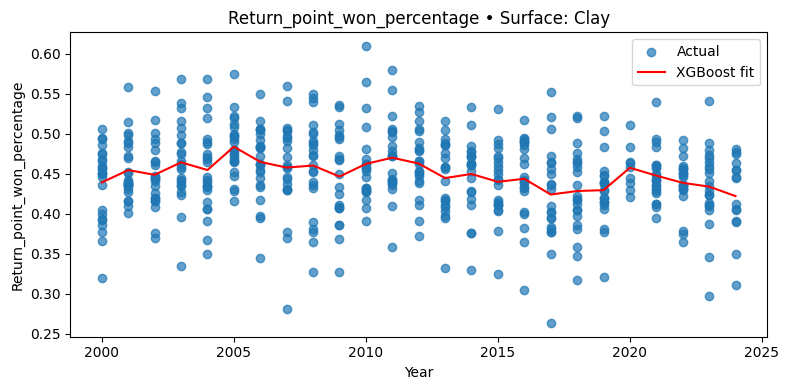

Break_point_conversion         | MAE = 0.072 | MSE = 0.008 | RMSE = 0.090 | R² = -0.008


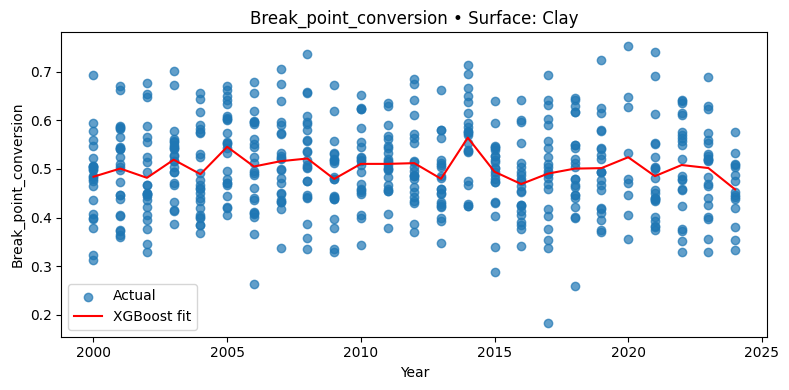


=== Surface: Hard ===
Serve_point_won_percentage     | MAE = 0.041 | MSE = 0.003 | RMSE = 0.058 | R² = -0.112


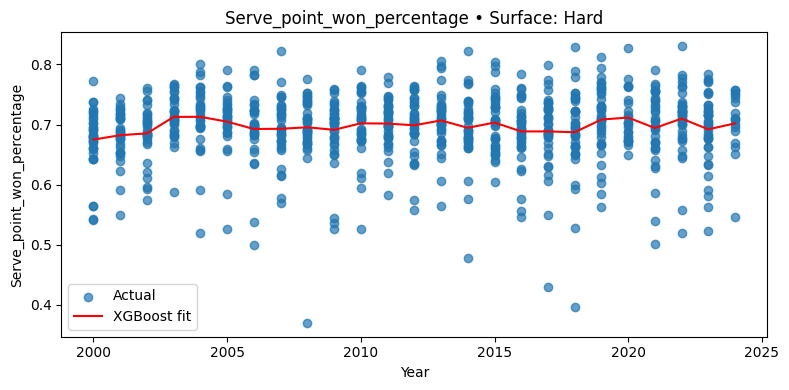

Ace_per_game                   | MAE = 0.265 | MSE = 0.115 | RMSE = 0.338 | R² = -0.101


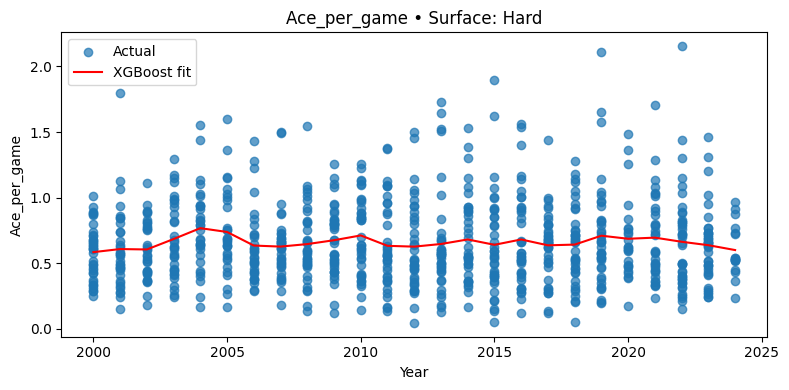

Break_point_save_percentage    | MAE = 0.137 | MSE = 0.030 | RMSE = 0.172 | R² = -0.045


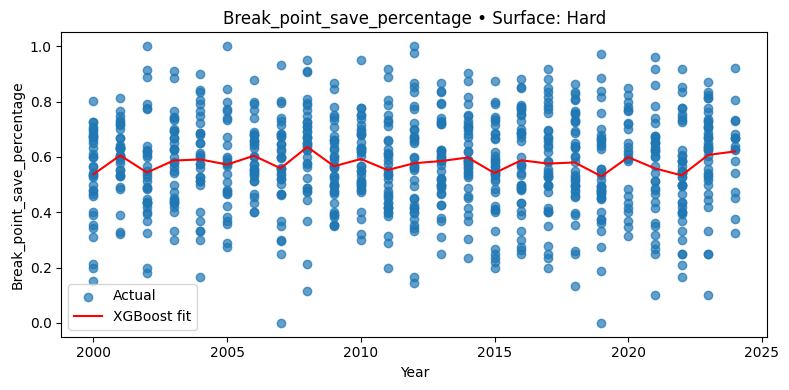

Return_point_won_percentage    | MAE = 0.039 | MSE = 0.003 | RMSE = 0.050 | R² = -0.023


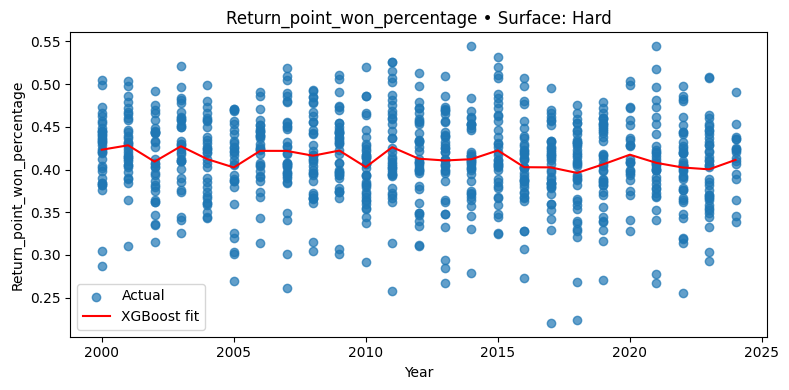

Break_point_conversion         | MAE = 0.077 | MSE = 0.010 | RMSE = 0.099 | R² = -0.016


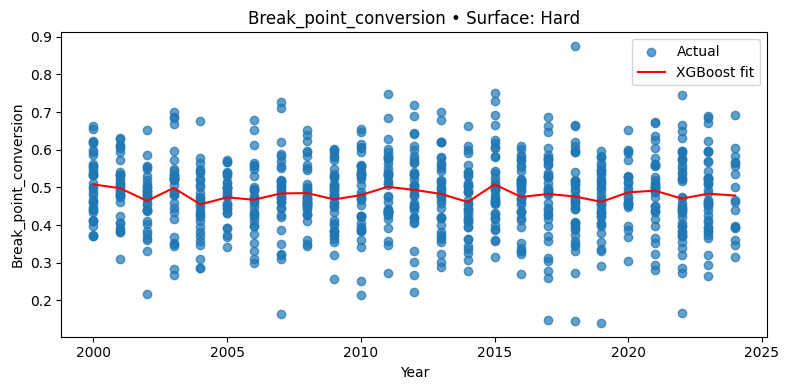


=== Surface: Grass ===
Serve_point_won_percentage     | MAE = 0.038 | MSE = 0.003 | RMSE = 0.053 | R² = -0.221


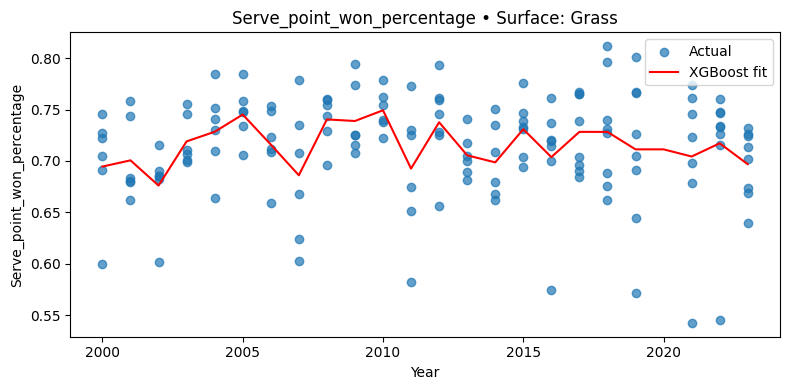

Ace_per_game                   | MAE = 0.282 | MSE = 0.133 | RMSE = 0.356 | R² = -0.186


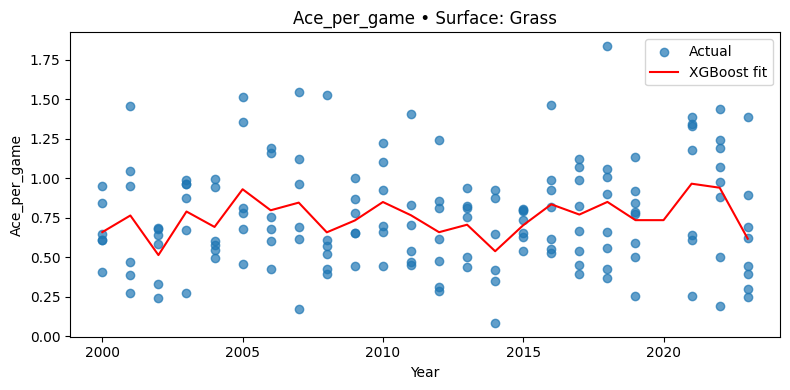

Break_point_save_percentage    | MAE = 0.164 | MSE = 0.043 | RMSE = 0.199 | R² = -0.579


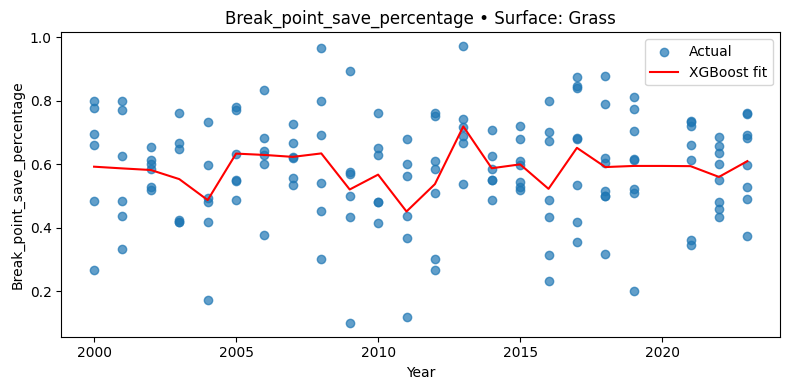

Return_point_won_percentage    | MAE = 0.042 | MSE = 0.003 | RMSE = 0.051 | R² = -0.196


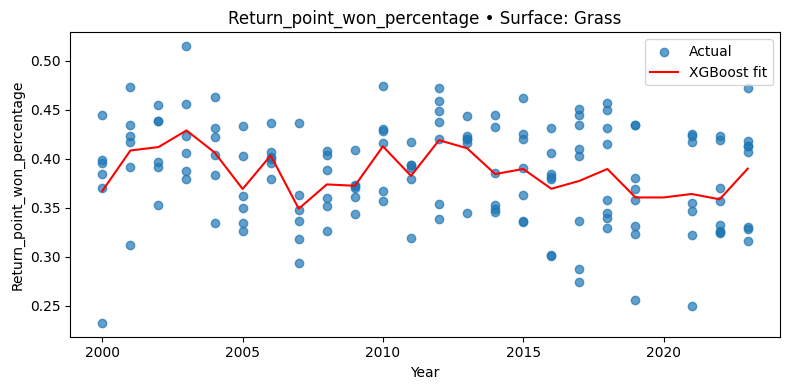

Break_point_conversion         | MAE = 0.090 | MSE = 0.014 | RMSE = 0.117 | R² = -0.078


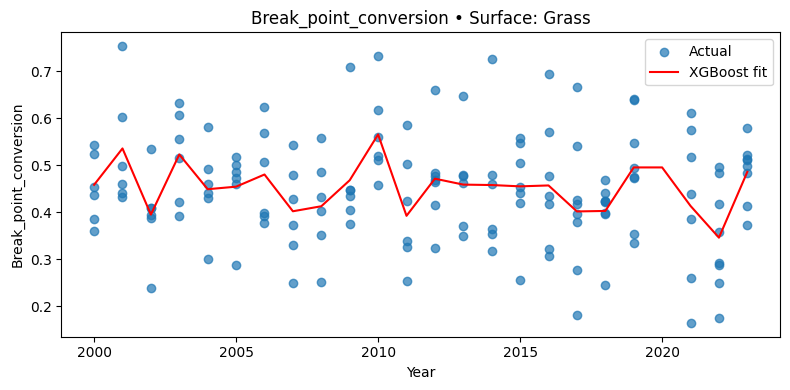


=== Surface: Carpet ===
Serve_point_won_percentage     | MAE = 0.043 | MSE = 0.004 | RMSE = 0.054 | R² = -0.235


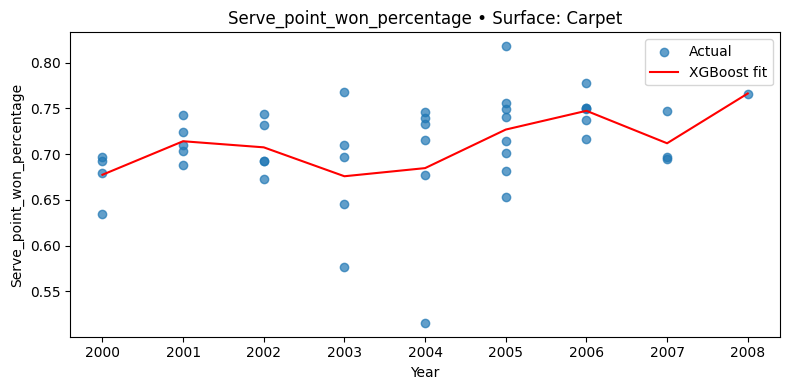

Ace_per_game                   | MAE = 0.307 | MSE = 0.157 | RMSE = 0.384 | R² = -0.734


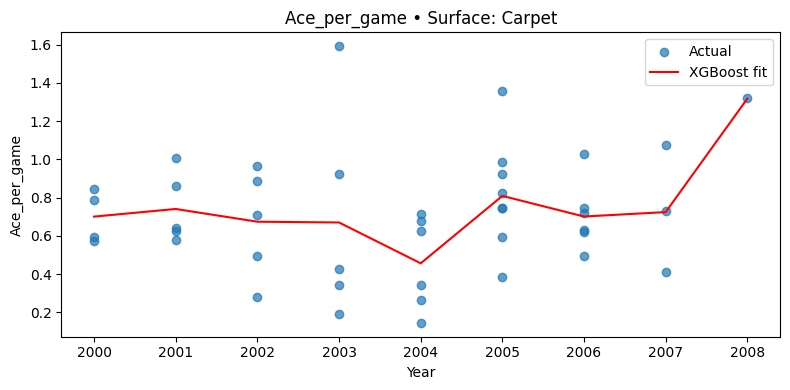

Break_point_save_percentage    | MAE = 0.151 | MSE = 0.038 | RMSE = 0.194 | R² = -0.764


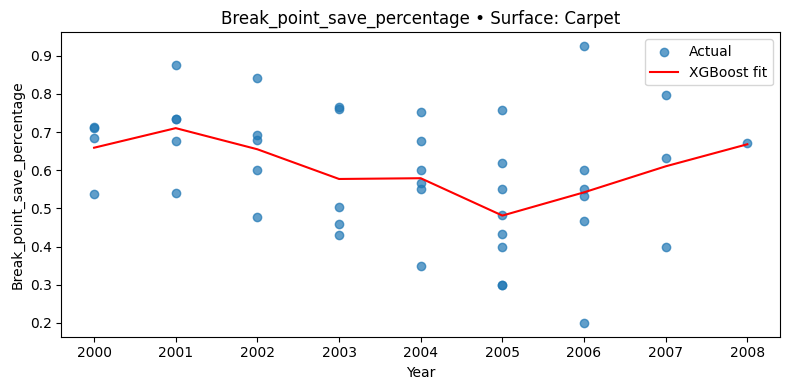

Return_point_won_percentage    | MAE = 0.055 | MSE = 0.005 | RMSE = 0.067 | R² = -2.098


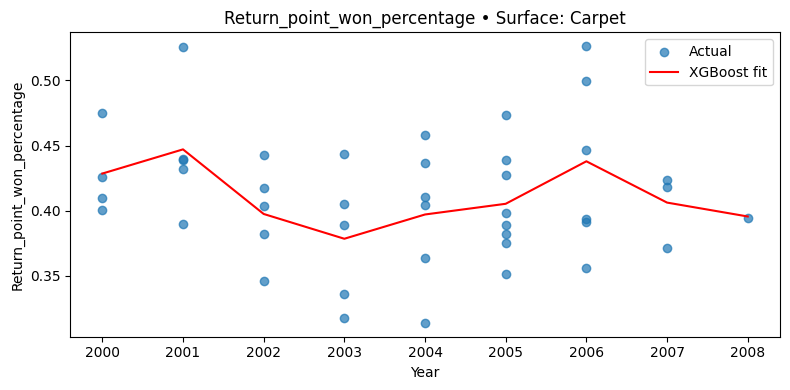

Break_point_conversion         | MAE = 0.094 | MSE = 0.013 | RMSE = 0.111 | R² = -0.216


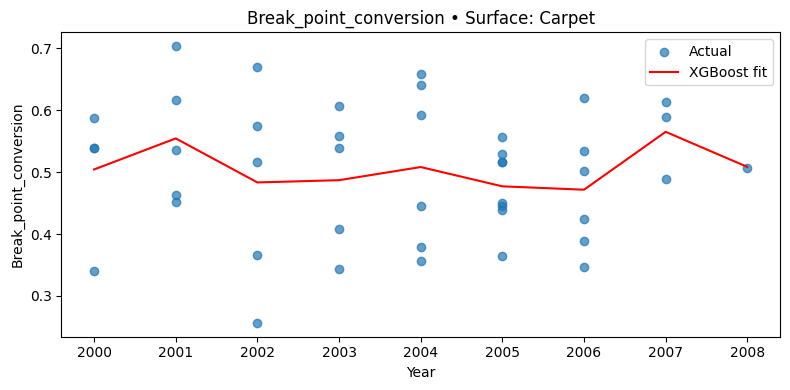

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# CONFIG
CSV_PATH   = "updatedData.csv"
YEAR_COL   = "Year"
SURFACE_COL = "surface"
SURFACES   = ["Clay", "Hard", "Grass", "Carpet"]
METRICS    = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]
XGB_PARAMS = dict(
    objective="reg:squarederror",
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
N_SPLITS = 5
PLOT_FITS = True

# Load data
df = pd.read_csv(CSV_PATH)

for surface in SURFACES:
    df_surface = df[df[SURFACE_COL] == surface]
    if df_surface.empty:
        print(f"[!] No data for surface: {surface}")
        continue

    print(f"\n=== Surface: {surface} ===")

    for metric in METRICS:
        X = df_surface[[YEAR_COL]].values
        y = df_surface[metric].values

        mae_scores, mse_scores, rmse_scores, r2_scores = [], [], [], []
        tscv = TimeSeriesSplit(n_splits=N_SPLITS)

        for train_idx, test_idx in tscv.split(X):
            model = XGBRegressor(**XGB_PARAMS)
            model.fit(X[train_idx], y[train_idx])
            y_pred = model.predict(X[test_idx])

            mae = mean_absolute_error(y[test_idx], y_pred)
            mse = mean_squared_error(y[test_idx], y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y[test_idx], y_pred)

            mae_scores.append(mae)
            mse_scores.append(mse)
            rmse_scores.append(rmse)
            r2_scores.append(r2)

        print(f"{metric:30} | MAE = {np.mean(mae_scores):.3f}"
              f" | MSE = {np.mean(mse_scores):.3f}"
              f" | RMSE = {np.mean(rmse_scores):.3f}"
              f" | R² = {np.mean(r2_scores):.3f}")

        model_full = XGBRegressor(**XGB_PARAMS).fit(X, y)

        if PLOT_FITS:
            years_grid = pd.DataFrame({
                YEAR_COL: range(df_surface[YEAR_COL].min(), df_surface[YEAR_COL].max() + 1)
            })
            y_grid_pred = model_full.predict(years_grid)

            plt.figure(figsize=(8, 4))
            plt.scatter(X, y, label="Actual", alpha=0.7)
            plt.plot(years_grid, y_grid_pred, color="red", label="XGBoost fit")
            plt.title(f"{metric} • Surface: {surface}")
            plt.xlabel("Year")
            plt.ylabel(metric)
            plt.legend()
            plt.tight_layout()
            plt.show()

This code is for each tournament level.


=== Tournament Level: A ===
Serve_point_won_percentage     | MAE = 0.042 | MSE = 0.003 | RMSE = 0.056 | R² = -0.082


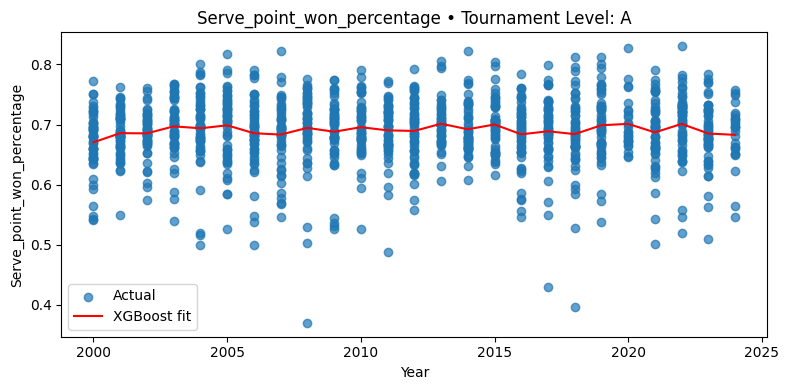

Ace_per_game                   | MAE = 0.286 | MSE = 0.126 | RMSE = 0.354 | R² = -0.079


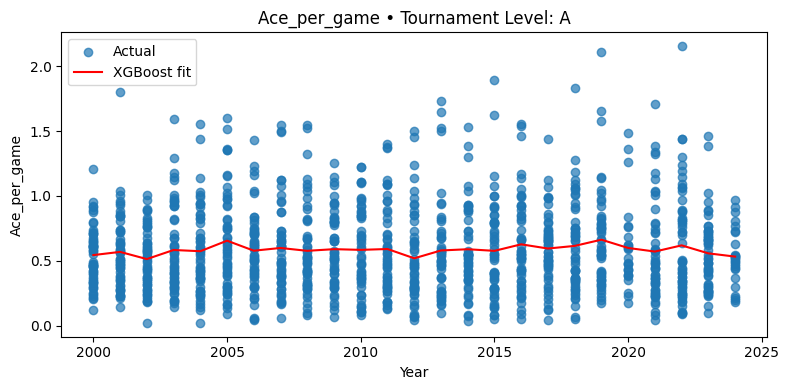

Break_point_save_percentage    | MAE = 0.143 | MSE = 0.031 | RMSE = 0.177 | R² = -0.119


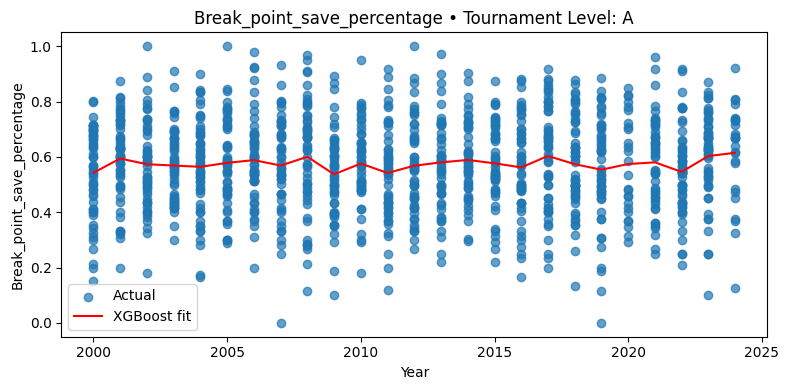

Return_point_won_percentage    | MAE = 0.043 | MSE = 0.003 | RMSE = 0.055 | R² = -0.035


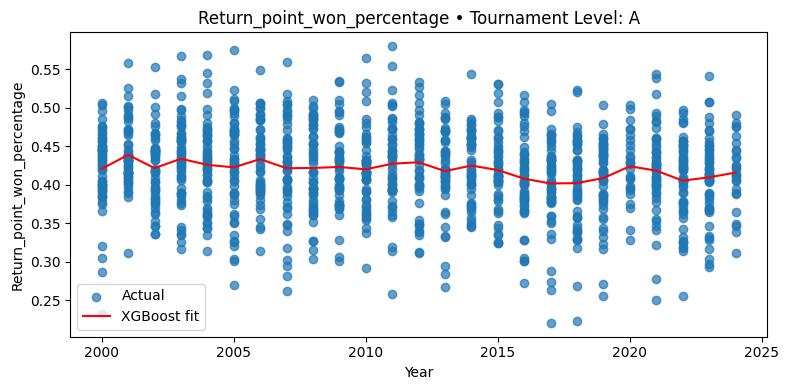

Break_point_conversion         | MAE = 0.083 | MSE = 0.011 | RMSE = 0.106 | R² = -0.083


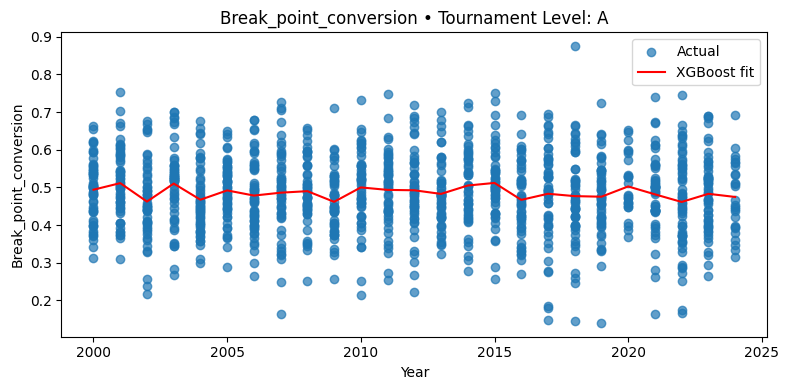


=== Tournament Level: M ===
Serve_point_won_percentage     | MAE = 0.044 | MSE = 0.003 | RMSE = 0.055 | R² = -0.260


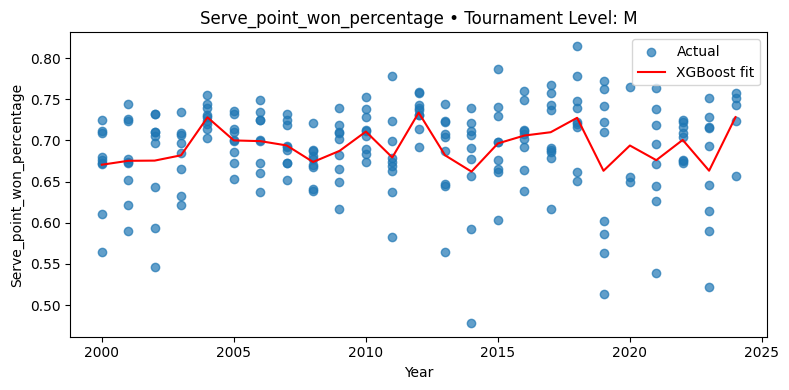

Ace_per_game                   | MAE = 0.252 | MSE = 0.110 | RMSE = 0.329 | R² = -0.243


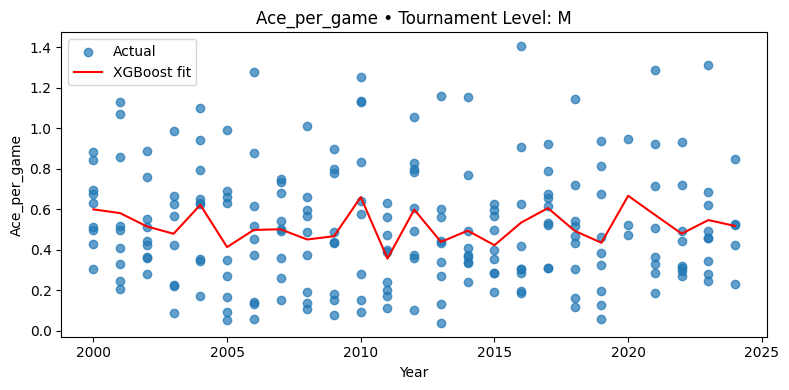

Break_point_save_percentage    | MAE = 0.129 | MSE = 0.028 | RMSE = 0.165 | R² = -0.193


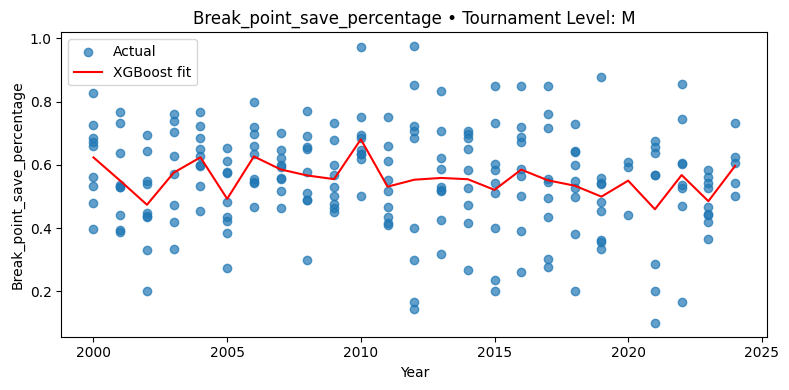

Return_point_won_percentage    | MAE = 0.059 | MSE = 0.006 | RMSE = 0.073 | R² = -0.973


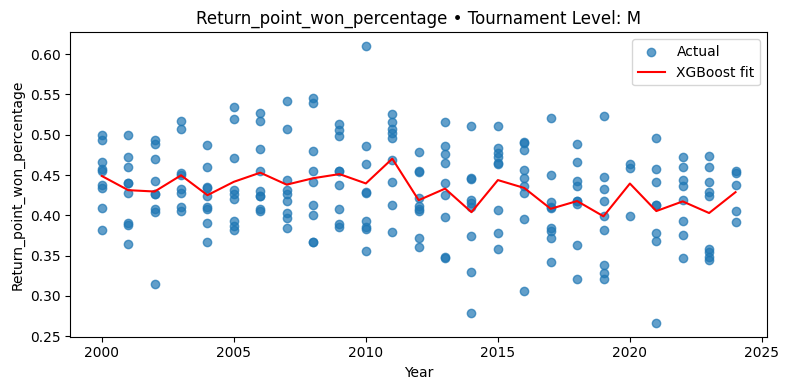

Break_point_conversion         | MAE = 0.093 | MSE = 0.013 | RMSE = 0.109 | R² = -1.012


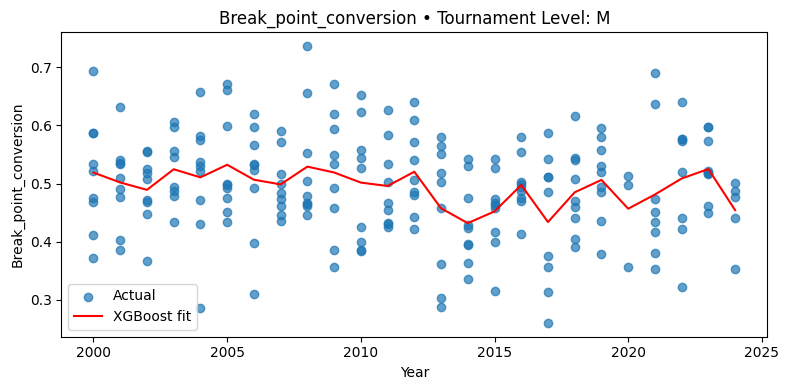


=== Tournament Level: G ===
Serve_point_won_percentage     | MAE = 0.031 | MSE = 0.002 | RMSE = 0.040 | R² = -0.178


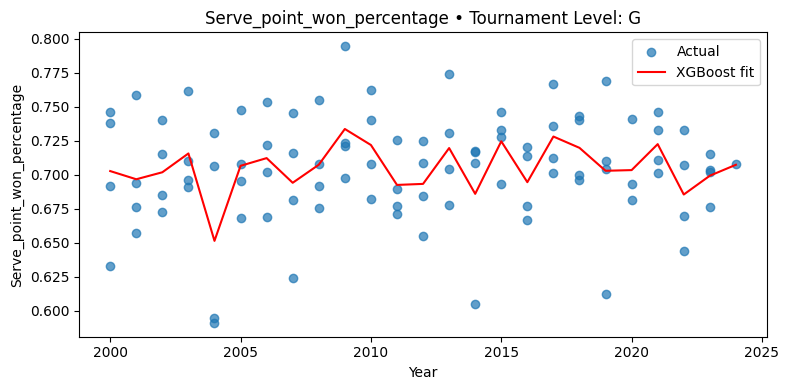

Ace_per_game                   | MAE = 0.185 | MSE = 0.054 | RMSE = 0.232 | R² = -0.184


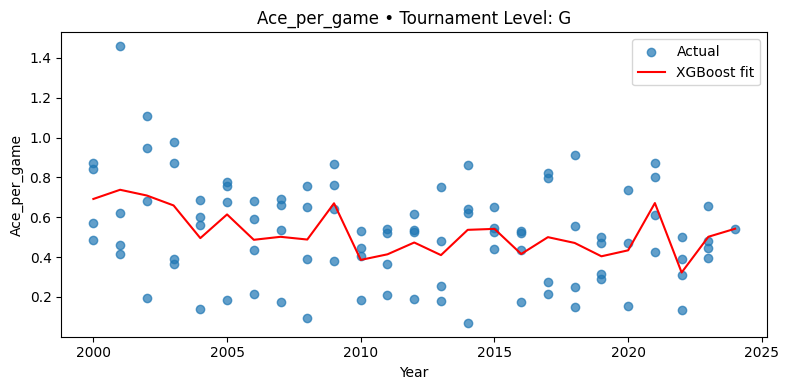

Break_point_save_percentage    | MAE = 0.106 | MSE = 0.017 | RMSE = 0.128 | R² = -0.668


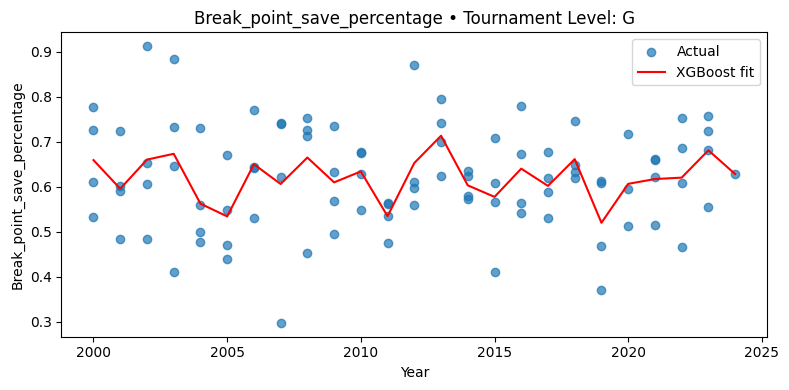

Return_point_won_percentage    | MAE = 0.038 | MSE = 0.002 | RMSE = 0.047 | R² = -0.206


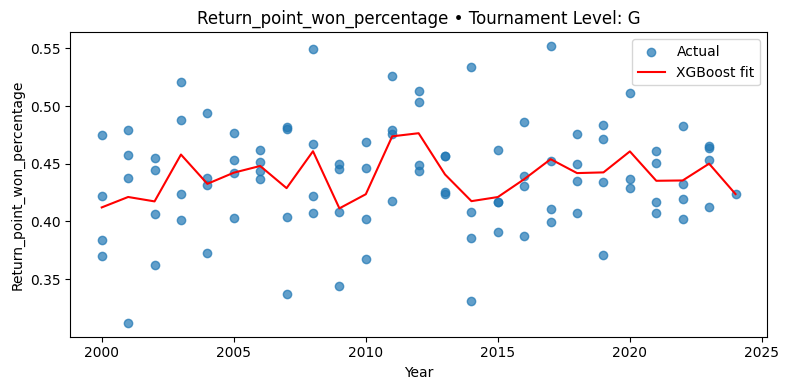

Break_point_conversion         | MAE = 0.066 | MSE = 0.007 | RMSE = 0.084 | R² = -0.480


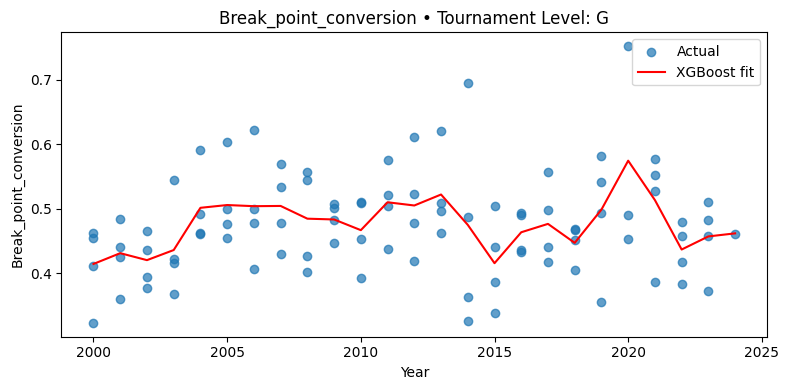


=== Tournament Level: F ===
Serve_point_won_percentage     | MAE = 0.060 | MSE = 0.006 | RMSE = 0.070 | R² = -4.290


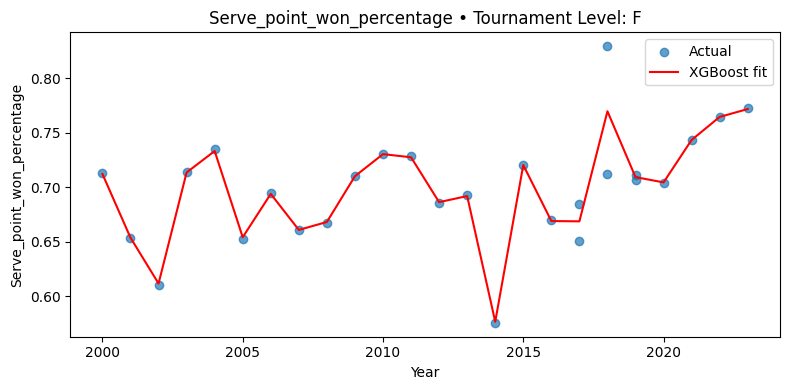

Ace_per_game                   | MAE = 0.235 | MSE = 0.084 | RMSE = 0.270 | R² = -5.607


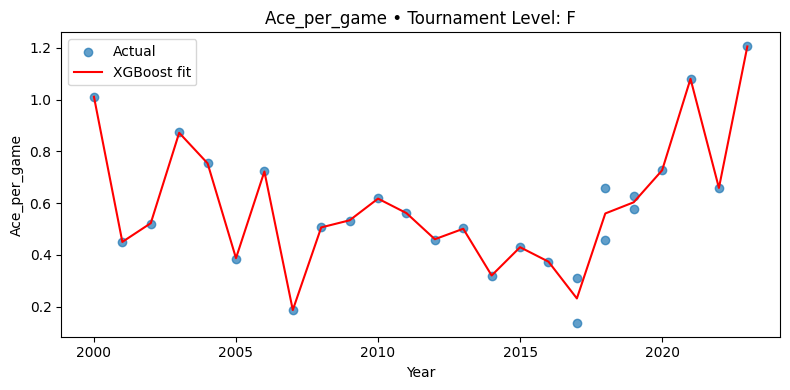

Break_point_save_percentage    | MAE = 0.213 | MSE = 0.070 | RMSE = 0.254 | R² = -0.925


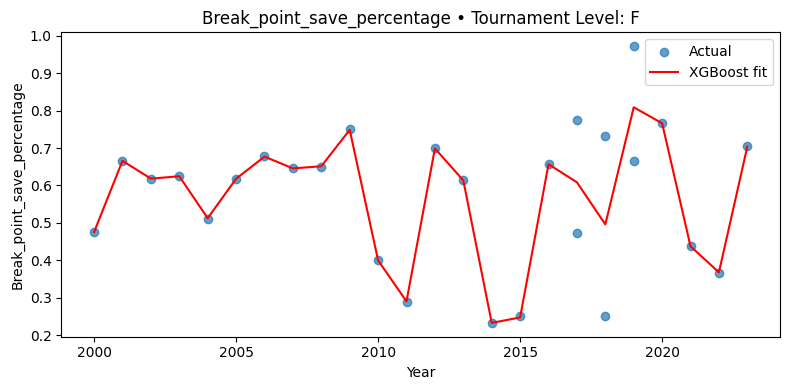

Return_point_won_percentage    | MAE = 0.038 | MSE = 0.002 | RMSE = 0.042 | R² = -1.373


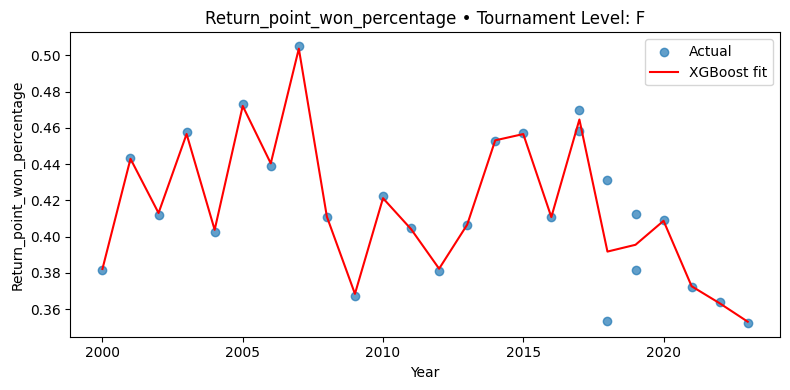

Break_point_conversion         | MAE = 0.077 | MSE = 0.009 | RMSE = 0.083 | R² = -0.955


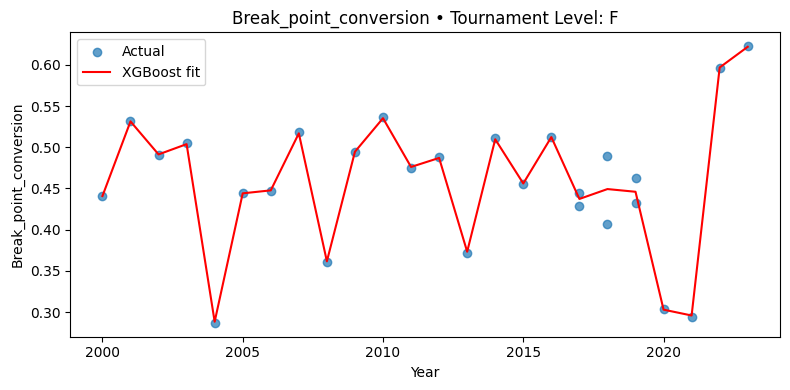

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# CONFIG
CSV_PATH     = "updatedData.csv"
YEAR_COL     = "Year"
LEVEL_COL    = "tourney_level"
LEVELS       = ["A", "M", "G", "F"]
METRICS      = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]
XGB_PARAMS = dict(
    objective="reg:squarederror",
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
N_SPLITS = 5
PLOT_FITS = True

# Load data
df = pd.read_csv(CSV_PATH)

for level in LEVELS:
    df_level = df[df[LEVEL_COL] == level]
    if df_level.empty:
        print(f"[!] No data for tournament level: {level}")
        continue

    print(f"\n=== Tournament Level: {level} ===")

    for metric in METRICS:
        X = df_level[[YEAR_COL]].values
        y = df_level[metric].values

        mae_scores, mse_scores, rmse_scores, r2_scores = [], [], [], []
        tscv = TimeSeriesSplit(n_splits=N_SPLITS)

        for train_idx, test_idx in tscv.split(X):
            model = XGBRegressor(**XGB_PARAMS)
            model.fit(X[train_idx], y[train_idx])
            y_pred = model.predict(X[test_idx])

            mae = mean_absolute_error(y[test_idx], y_pred)
            mse = mean_squared_error(y[test_idx], y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y[test_idx], y_pred)

            mae_scores.append(mae)
            mse_scores.append(mse)
            rmse_scores.append(rmse)
            r2_scores.append(r2)

        print(f"{metric:30} | MAE = {np.mean(mae_scores):.3f}"
              f" | MSE = {np.mean(mse_scores):.3f}"
              f" | RMSE = {np.mean(rmse_scores):.3f}"
              f" | R² = {np.mean(r2_scores):.3f}")

        model_full = XGBRegressor(**XGB_PARAMS).fit(X, y)

        if PLOT_FITS:
            years_grid = pd.DataFrame({
                YEAR_COL: range(df_level[YEAR_COL].min(), df_level[YEAR_COL].max() + 1)
            })
            y_grid_pred = model_full.predict(years_grid)

            plt.figure(figsize=(8, 4))
            plt.scatter(X, y, label="Actual", alpha=0.7)
            plt.plot(years_grid, y_grid_pred, color="red", label="XGBoost fit")
            plt.title(f"{metric} • Tournament Level: {level}")
            plt.xlabel("Year")
            plt.ylabel(metric)
            plt.legend()
            plt.tight_layout()
            plt.show()
